In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

## Problem Statement

#### Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale. 

#### A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

#### Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.


### 1.1 Outlier Treatment

In [3]:
Company = pd.read_excel('Company_Data2015.xlsx')

In [4]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Replacing column names which have symbols

In [5]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '').str.replace(']', '').str.replace('-', '_').str.replace('%', 'perc').str.replace('.', '').str.replace('/', '_to_')


In [6]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
 

In [8]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [9]:
Company.shape

(3586, 67)

In [10]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [11]:
Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


### 1.3 Transform Target variable into 0 and 1

In [12]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [13]:
Company[['default','Networth_Next_Year']].head(5)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36


In [14]:
Company[['default','Networth_Next_Year']].tail(5)

,default,Networth_Next_Year
3581,0,72677.77
3582,0,79162.19
3583,0,88134.31
3584,0,91293.70
3585,0,111729.10


In [15]:
Company[['default','Networth_Next_Year']].value_counts().sum()

3586

In [16]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [17]:
Company['default'].value_counts(normalize=True)

0    0.891801
1    0.108199
Name: default, dtype: float64

In [18]:

pd.options.display.float_format = '{:.2f}'.format   

In [19]:
Company['default'].value_counts(normalize=True)

0   0.89
1   0.11
Name: default, dtype: float64

### 1.4 Univariate & Bivariate analysis

### Univariate Analysis

In [20]:
Company_EDA = Company[['Networth_Next_Year','Equity_Paid_Up','Networth','Capital_Employed','Total_Debt','Gross_Block_','Net_Working_Capital_','Current_Assets_','Current_Liabilities_and_Provisions_','Total_Assets_to_Liabilities_','Gross_Sales','Net_Sales','Other_Income','Value_Of_Output','Cost_of_Production','Selling_Cost','Revenue_earnings_in_forex','Revenue_expenses_in_forex','Capital_expenses_in_forex','Book_Value_Unit_Curr','default']].copy()
Company_EDA.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,...,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,default
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,7.60,-0.07,137.67,0.00,0.00,0.00,0.00,-167.58,1
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,2892.73,46.27,2900.71,2572.46,40.51,6.35,143.42,141.17,-15.18,1
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,392.13,9.55,301.16,408.51,54.83,0.00,86.36,2.27,94.14,1
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,1354.39,223.85,1350.14,1326.99,3.34,0.89,28.88,0.00,-39.64,1
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,38.72,9.82,38.72,186.29,1.97,0.00,15.62,0.00,-212.89,1


In [21]:
df_desc = Company_EDA.describe().T
df_desc['Range'] = df_desc['max'] - df_desc['min']
df_desc['IQR'] = df_desc['75%'] - df_desc['25%']
df_desc['Qmin'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) < df_desc['min'],df_desc['min'],(df_desc['25%'] - 1.5 * df_desc['IQR']))
df_desc['Qmax'] = np.where((df_desc['25%'] - 1.5 * df_desc['IQR']) > df_desc['max'],df_desc['max'],(df_desc['75%'] + 1.5 * df_desc['IQR']))
df_desc

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10,119750.70,119.82,-175.74,303.53
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46,42263.46,15.77,0.00,43.17
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35,88684.83,113.41,-166.22,287.41
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25,715826.00,219.00,-320.90,555.11
Total_Debt,3586.00,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81,652824.53,72.32,-0.72,180.83
Gross_Block_,3586.00,594.18,4871.55,-41.19,0.57,15.87,131.90,128477.59,128518.78,131.33,-41.19,328.88
Net_Working_Capital_,3586.00,410.81,6301.22,-13162.42,0.94,10.14,61.17,223257.56,236419.98,60.23,-89.41,151.52
Current_Assets_,3586.00,1960.35,22577.57,-0.91,4.00,24.54,135.28,721166.00,721166.91,131.28,-0.91,332.19
Current_Liabilities_and_Provisions_,3586.00,391.99,2675.00,-0.23,0.73,9.23,65.65,83232.98,83233.21,64.92,-0.23,163.03
Total_Assets_to_Liabilities_,3586.00,1778.45,11437.57,-4.51,10.55,52.01,310.54,254737.22,254741.73,299.99,-4.51,760.52


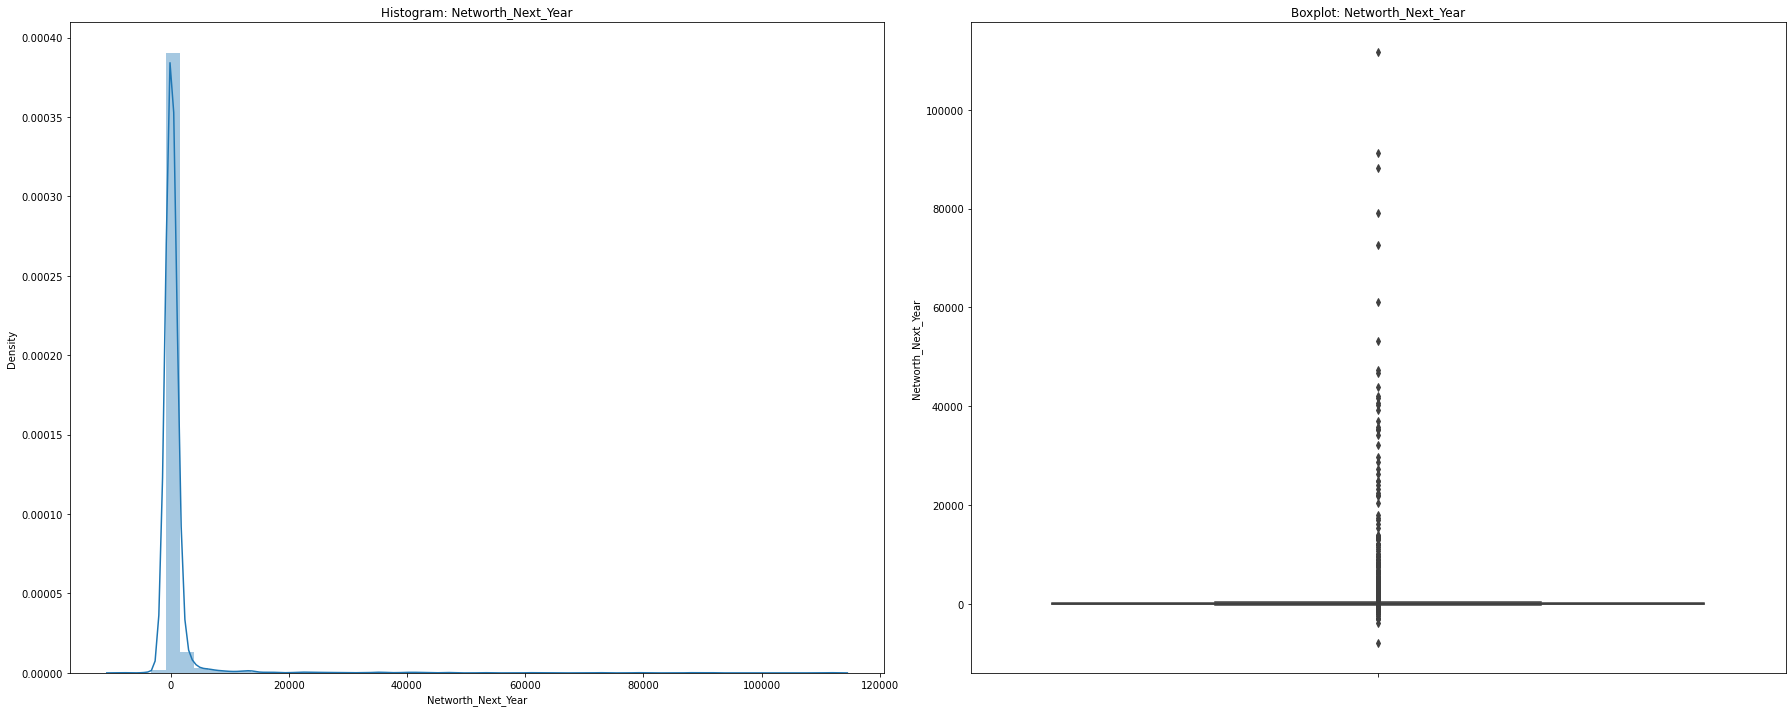

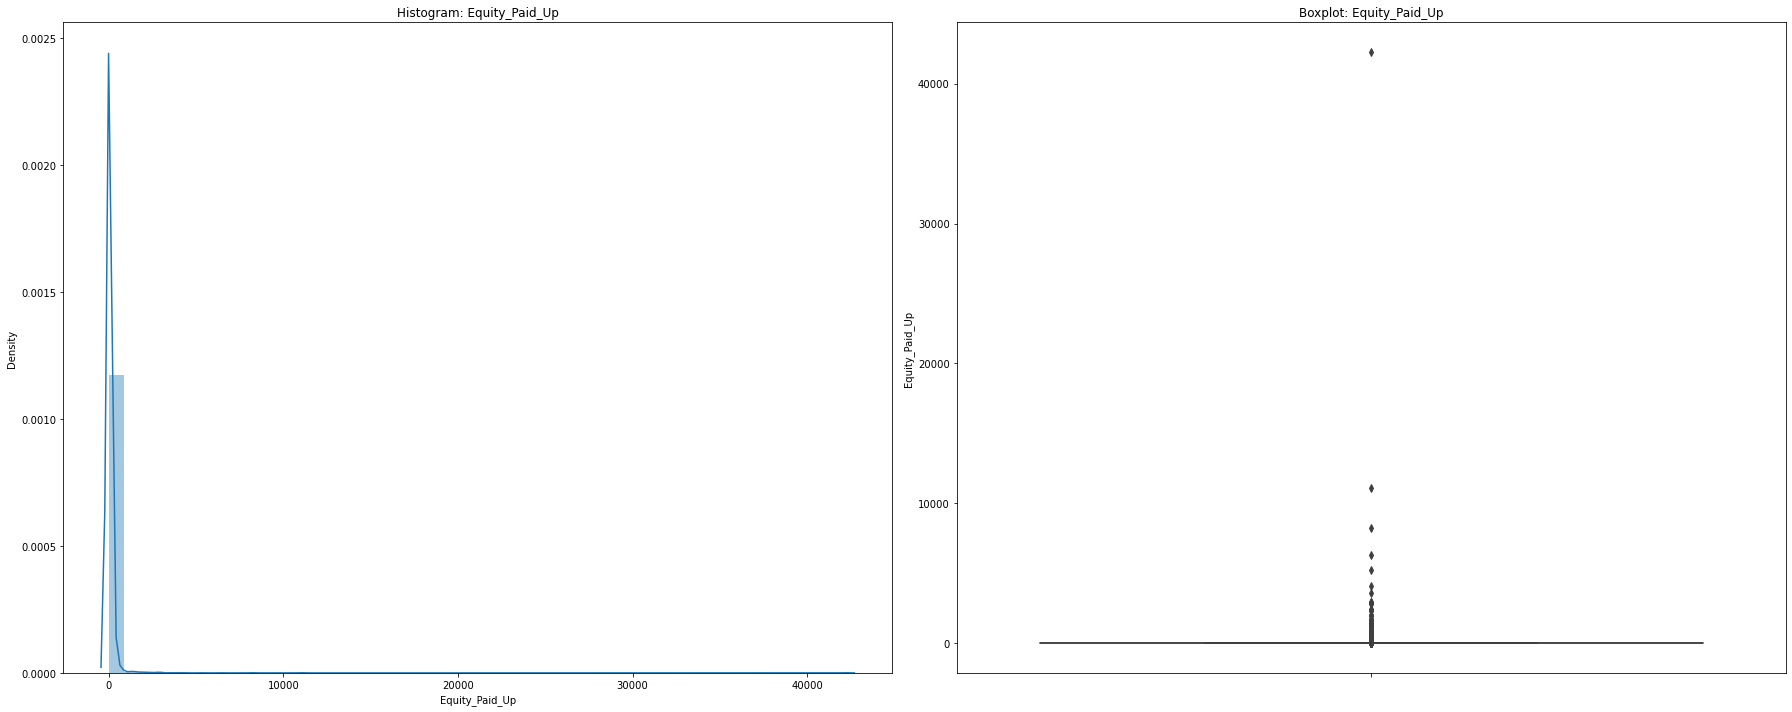

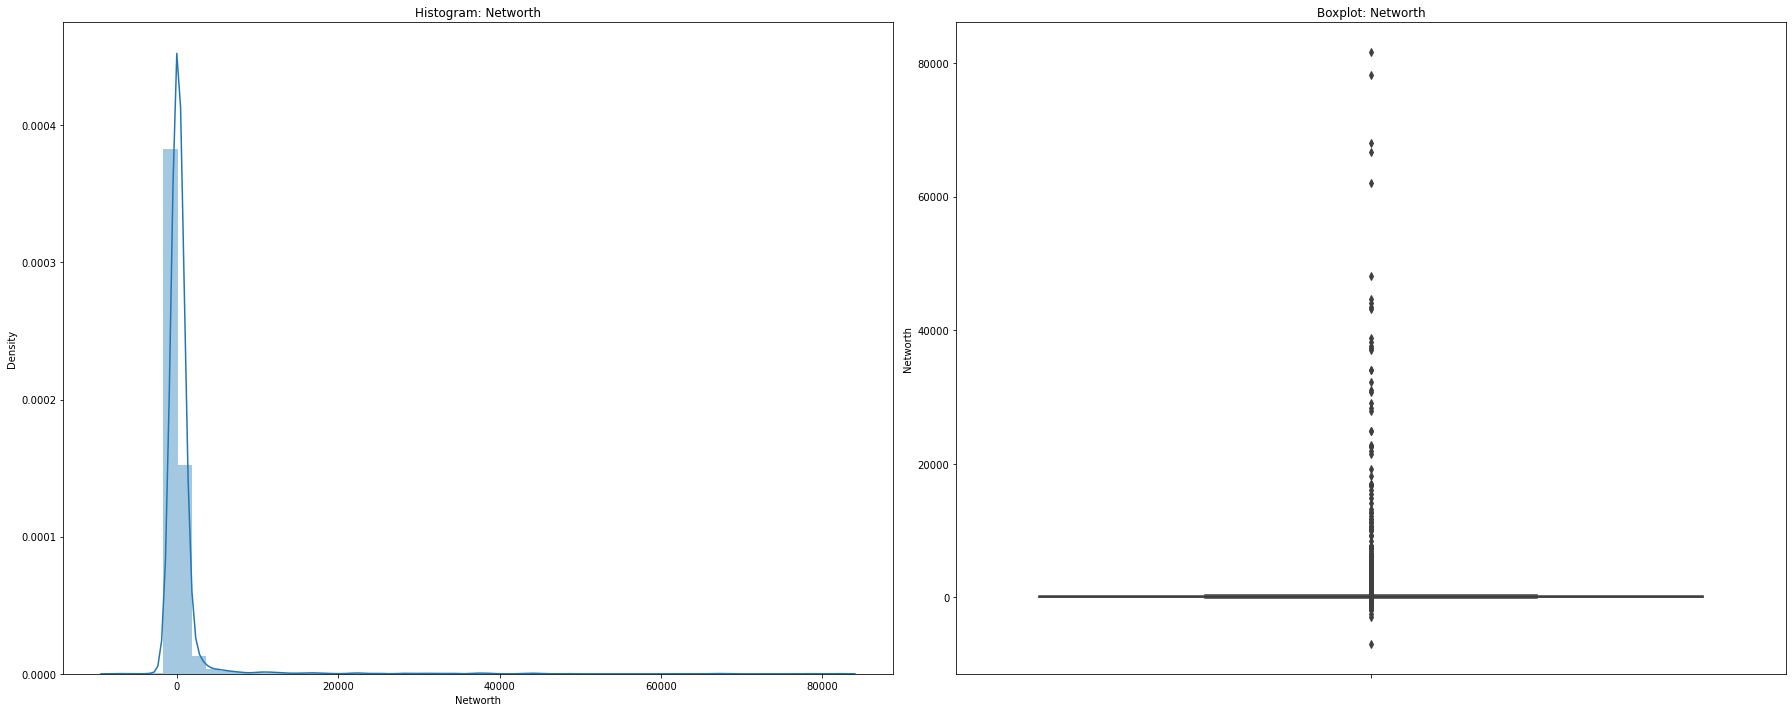

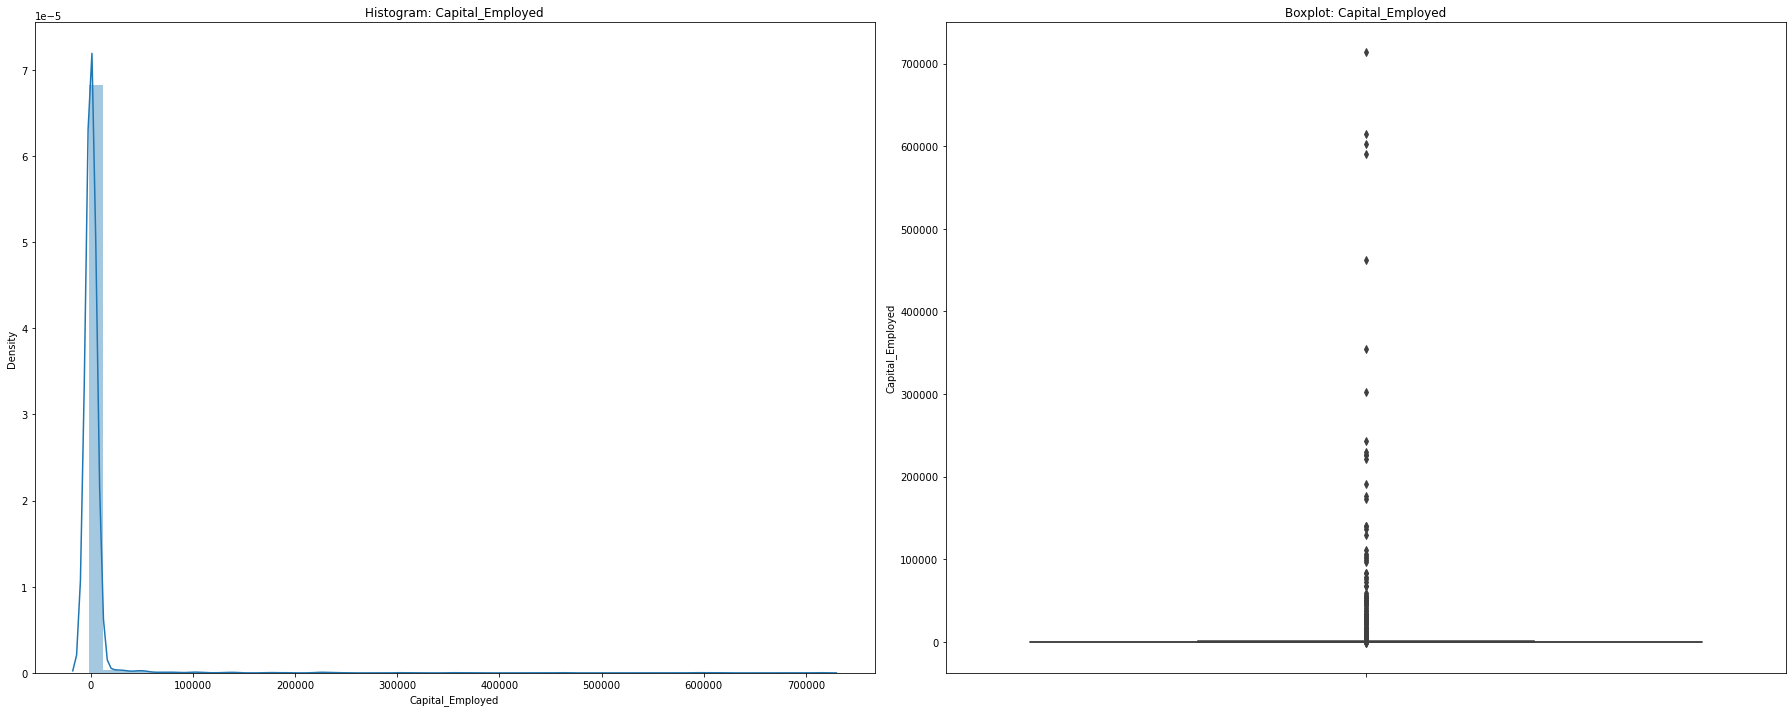

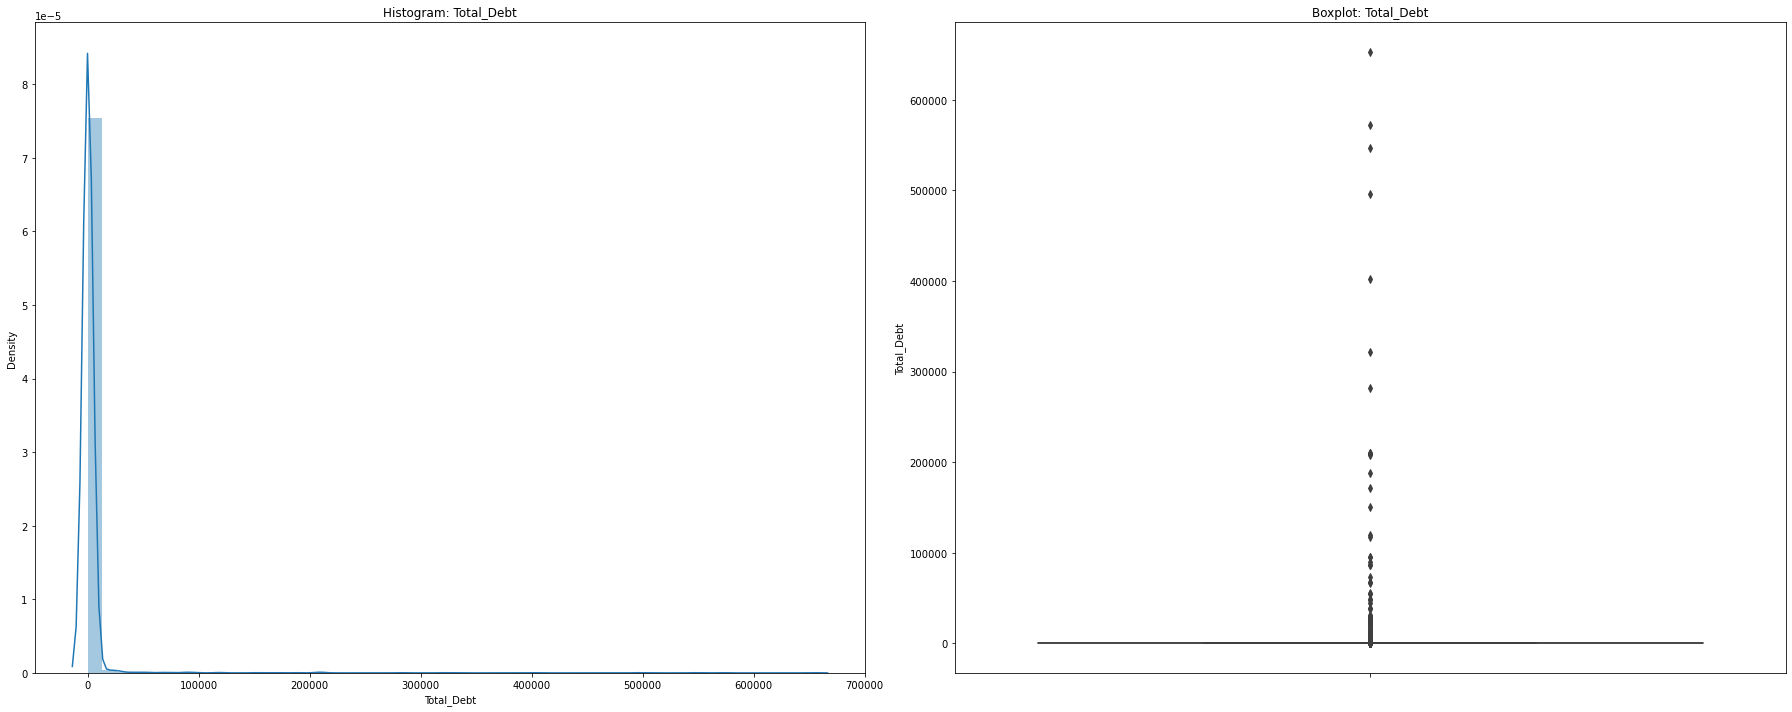

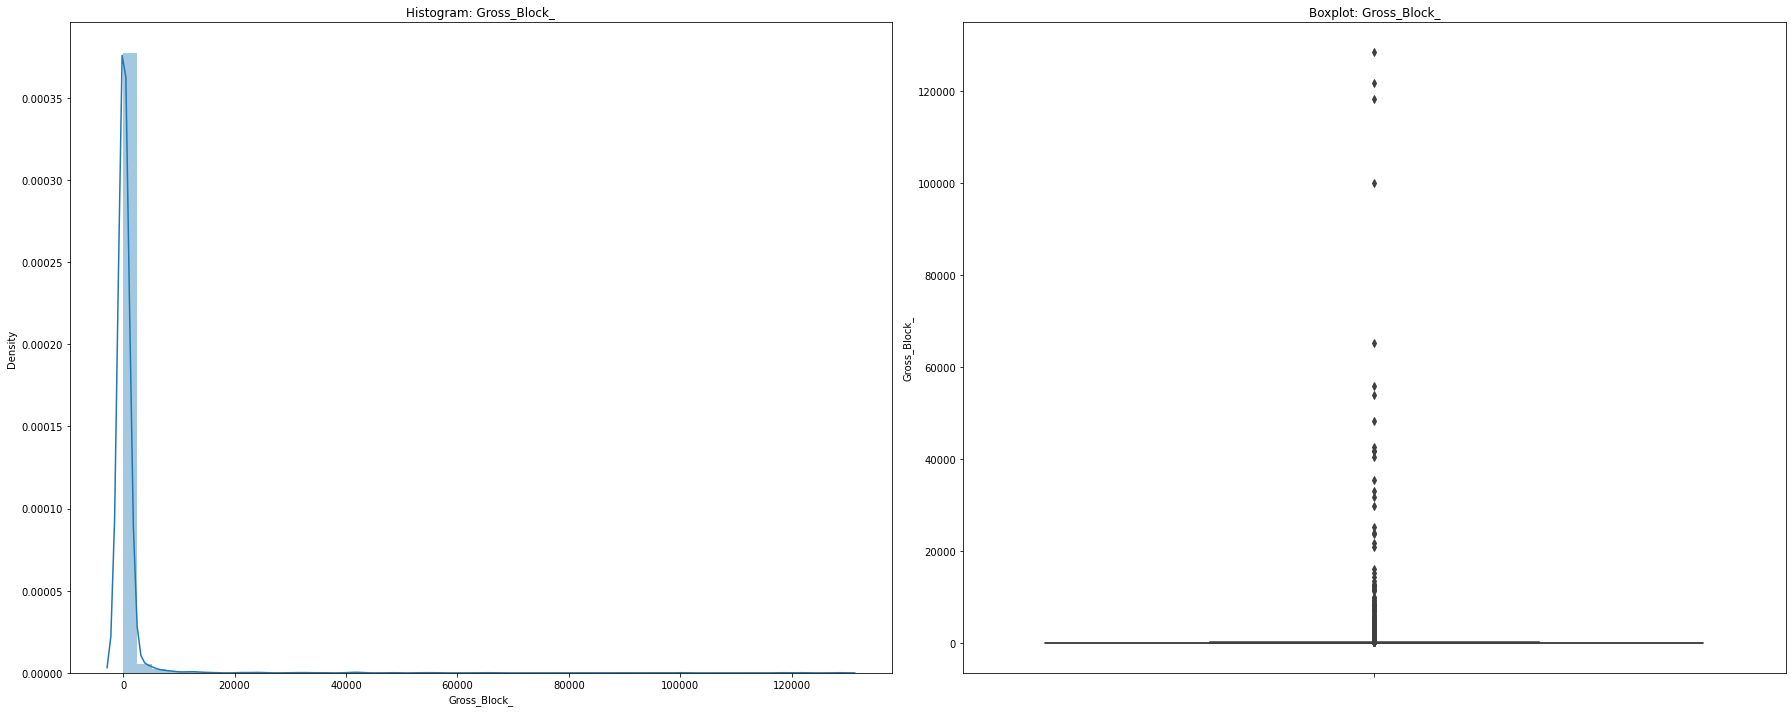

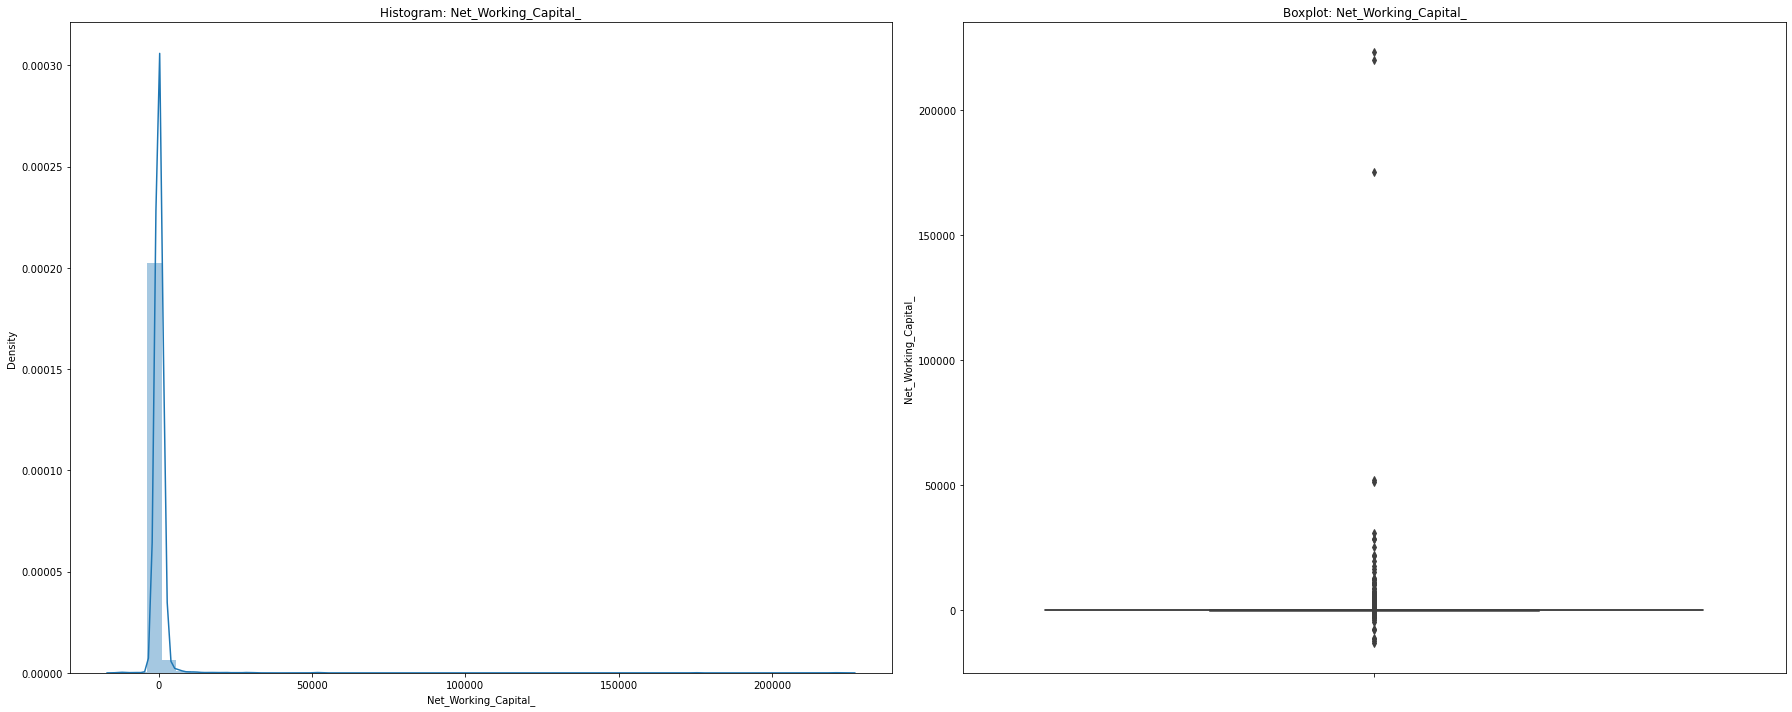

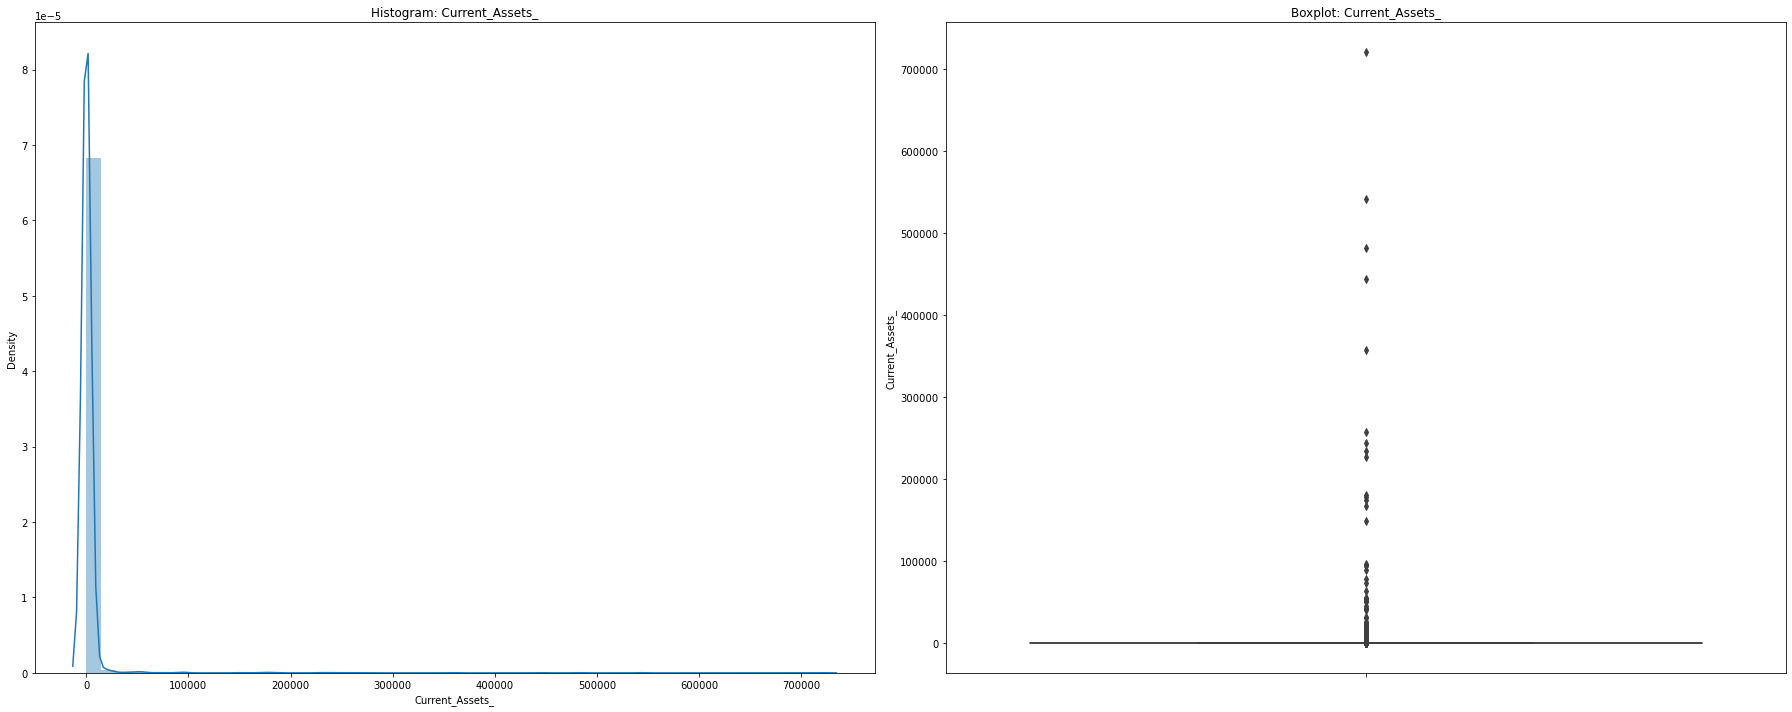

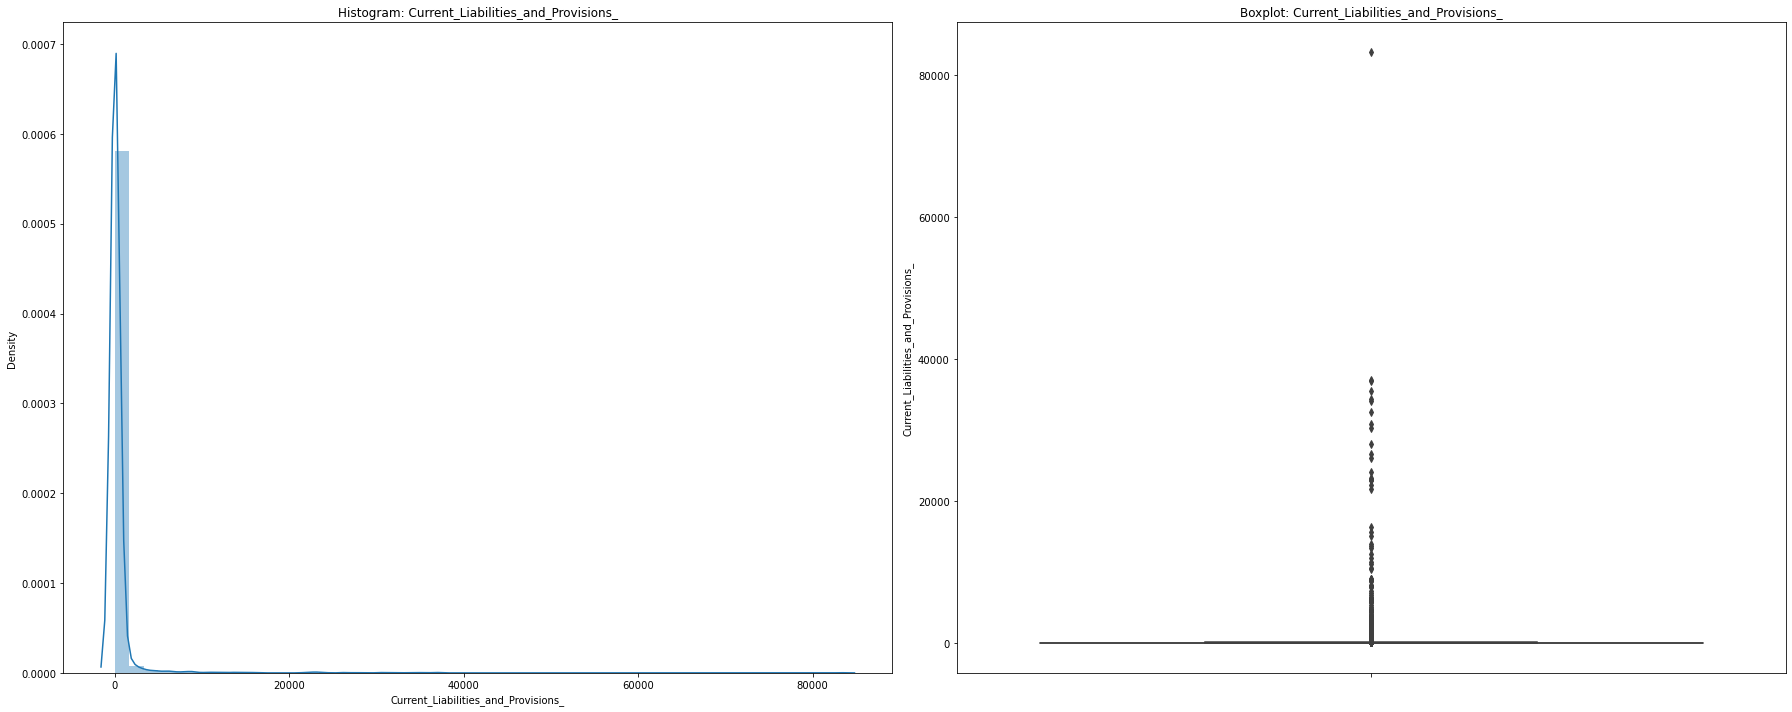

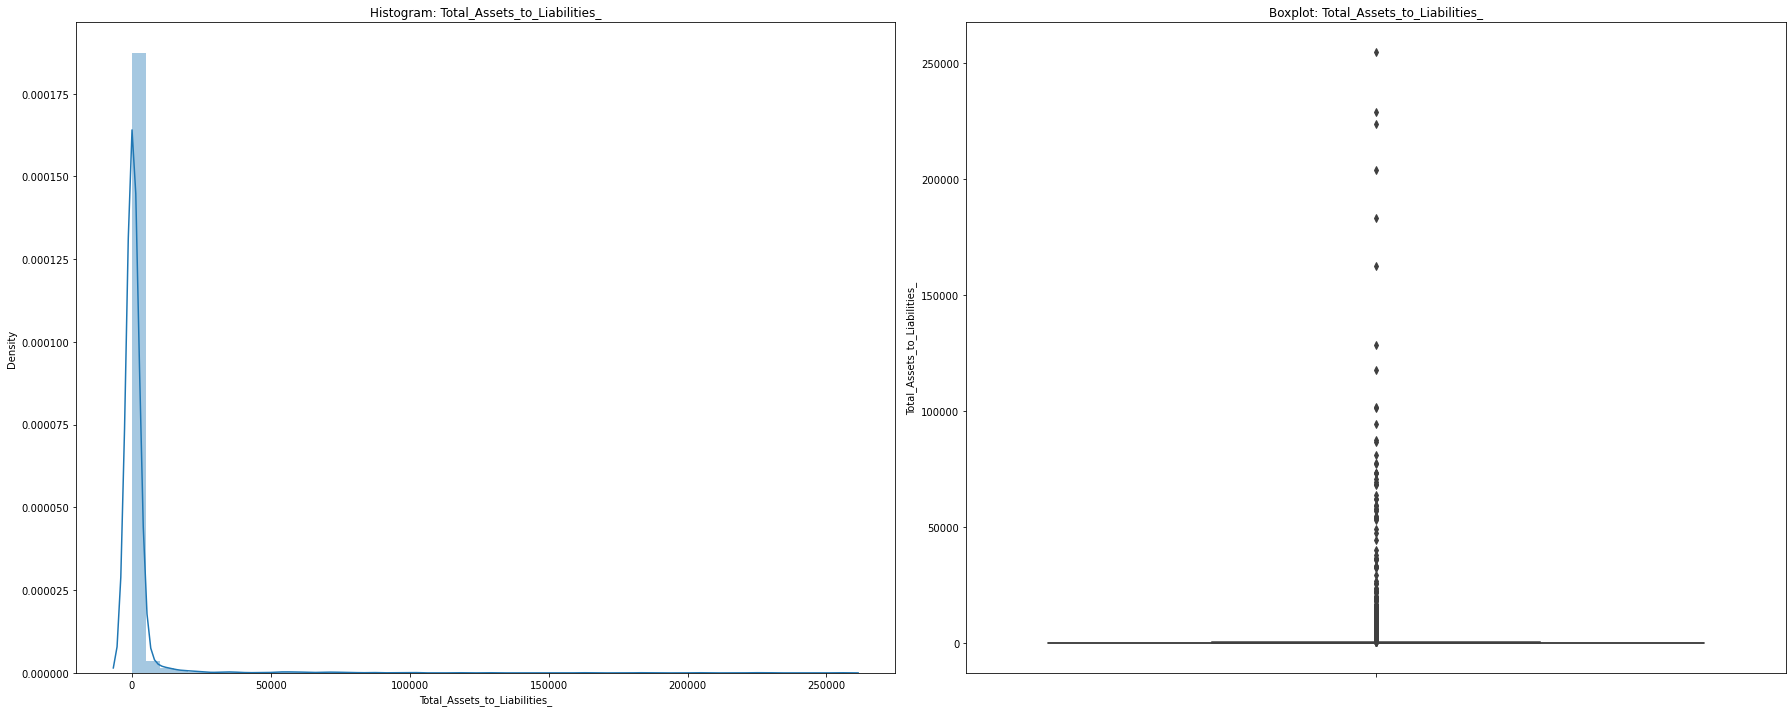

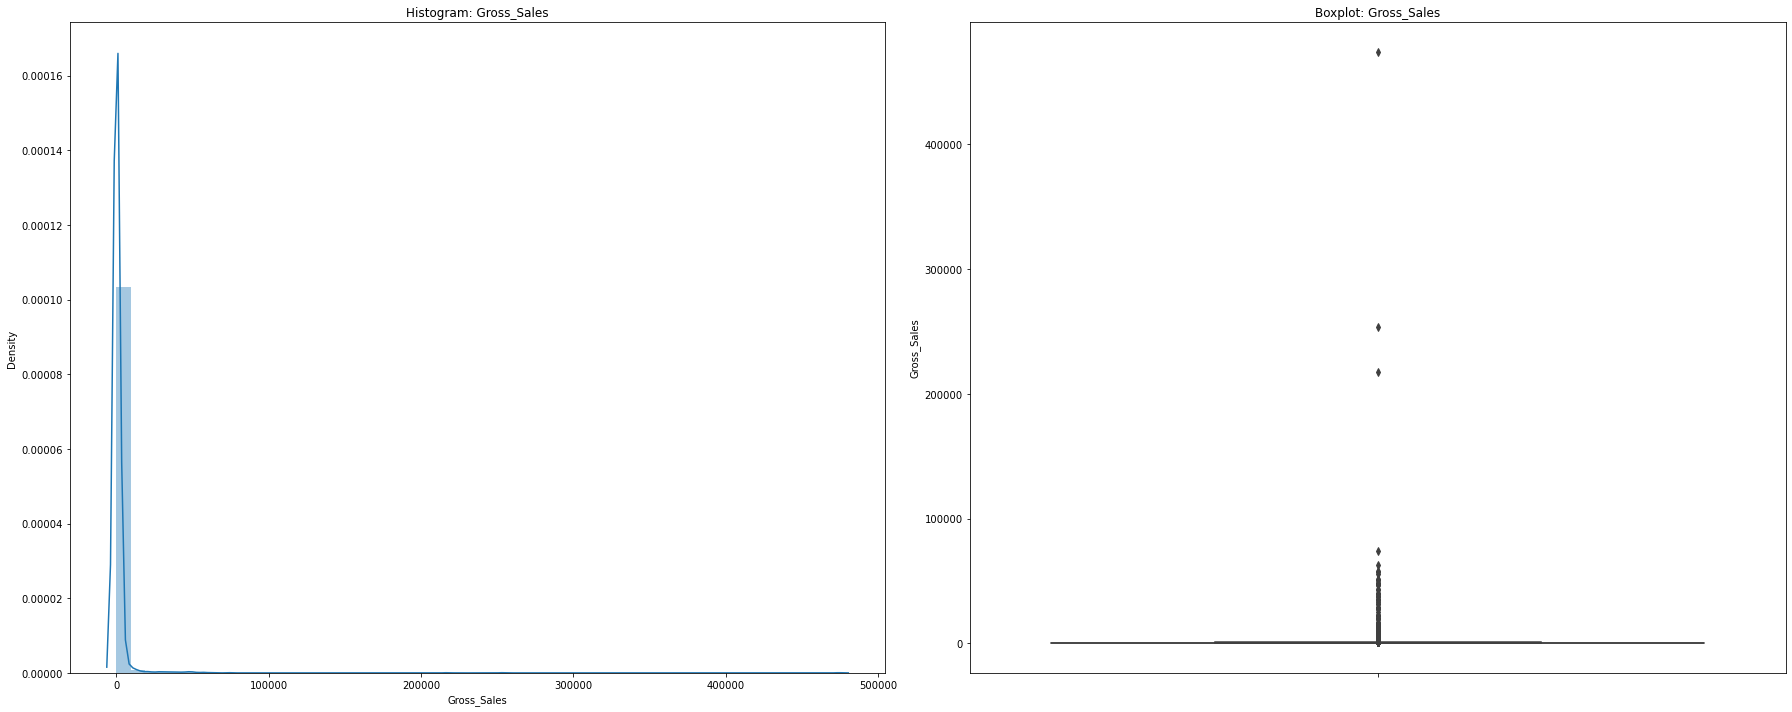

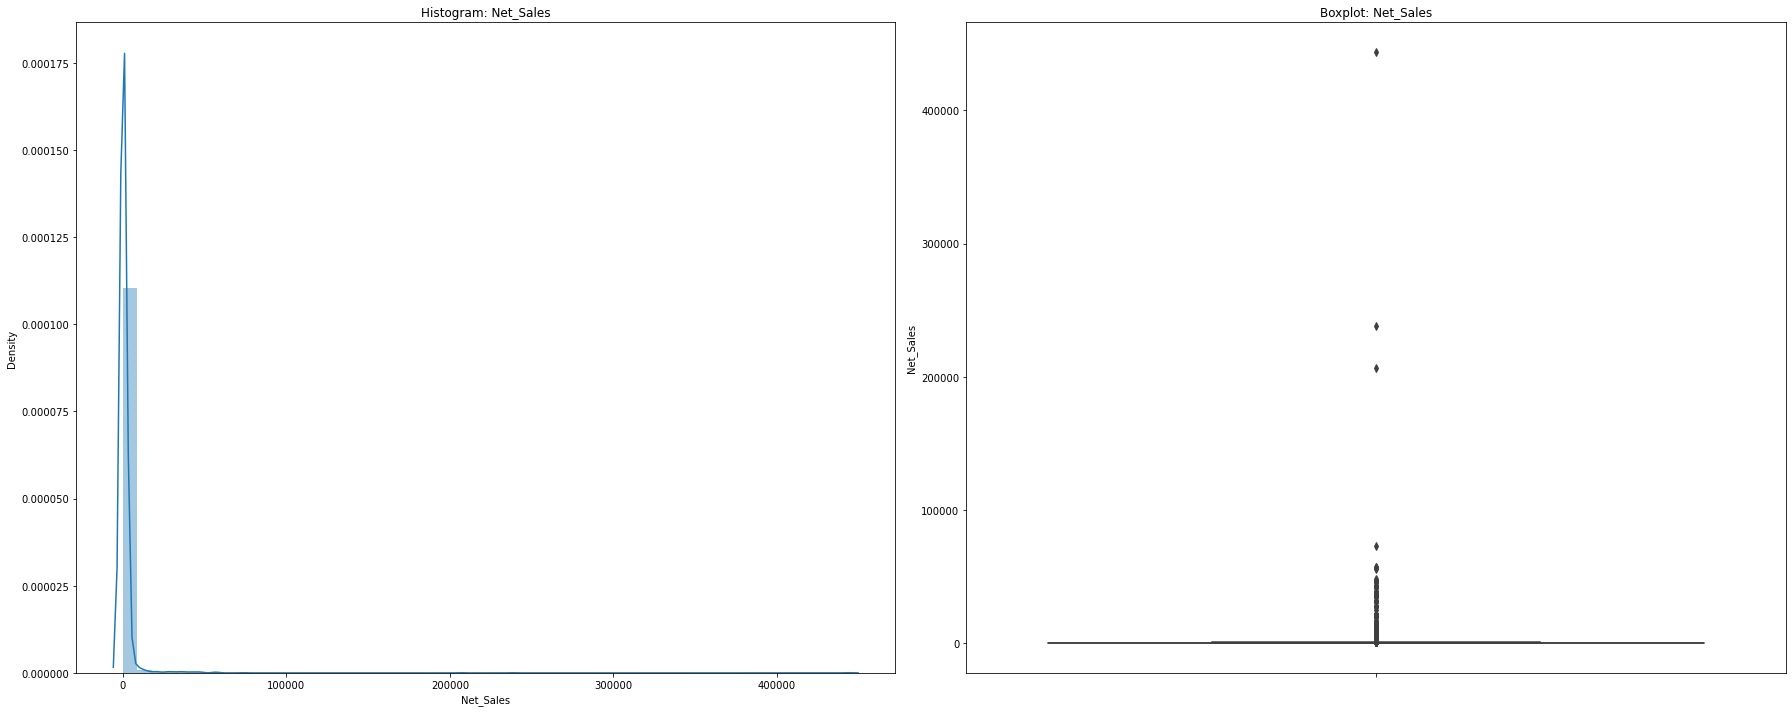

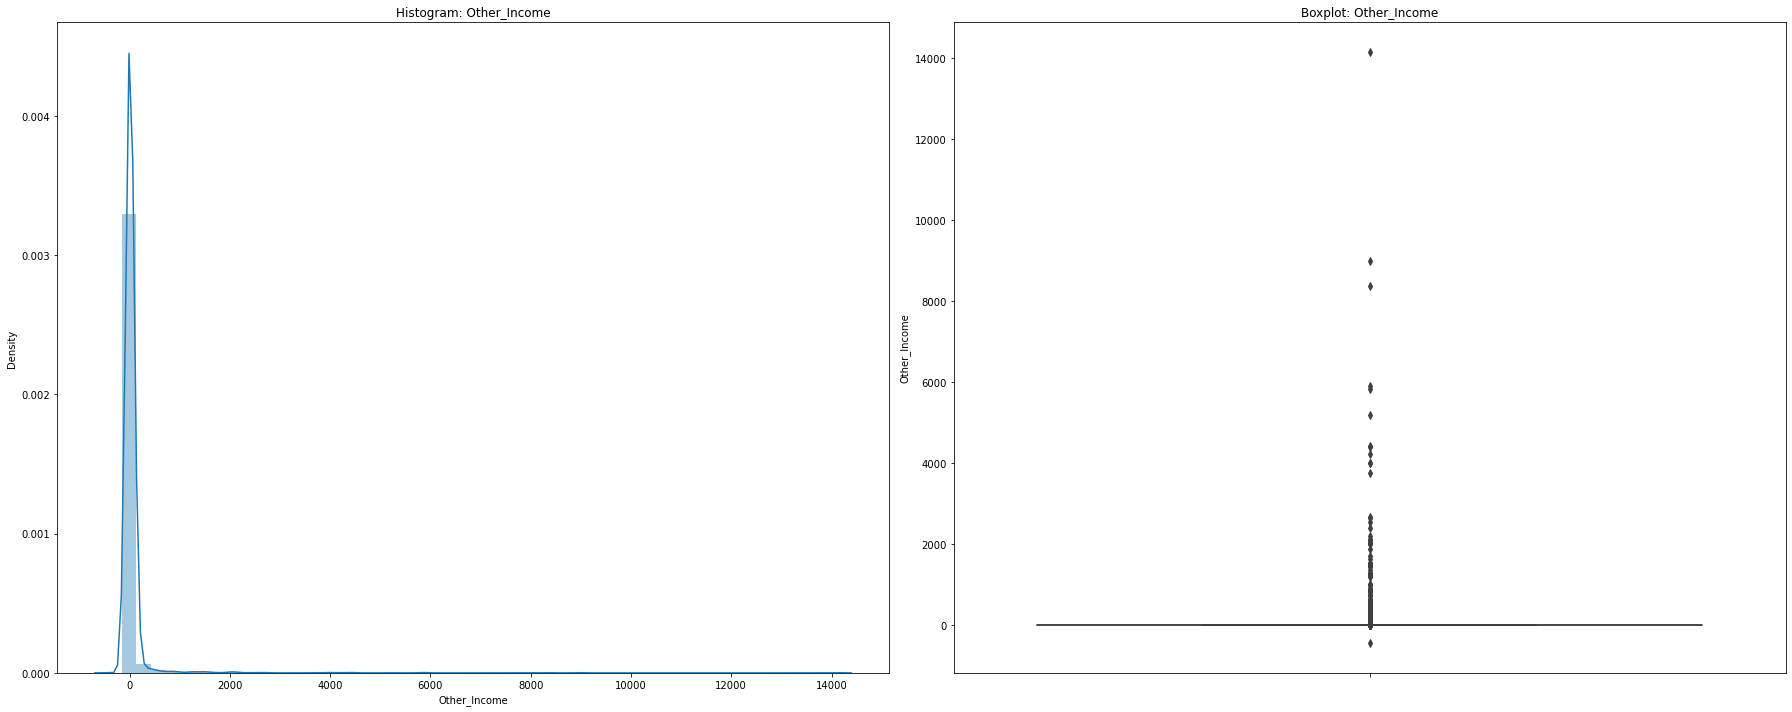

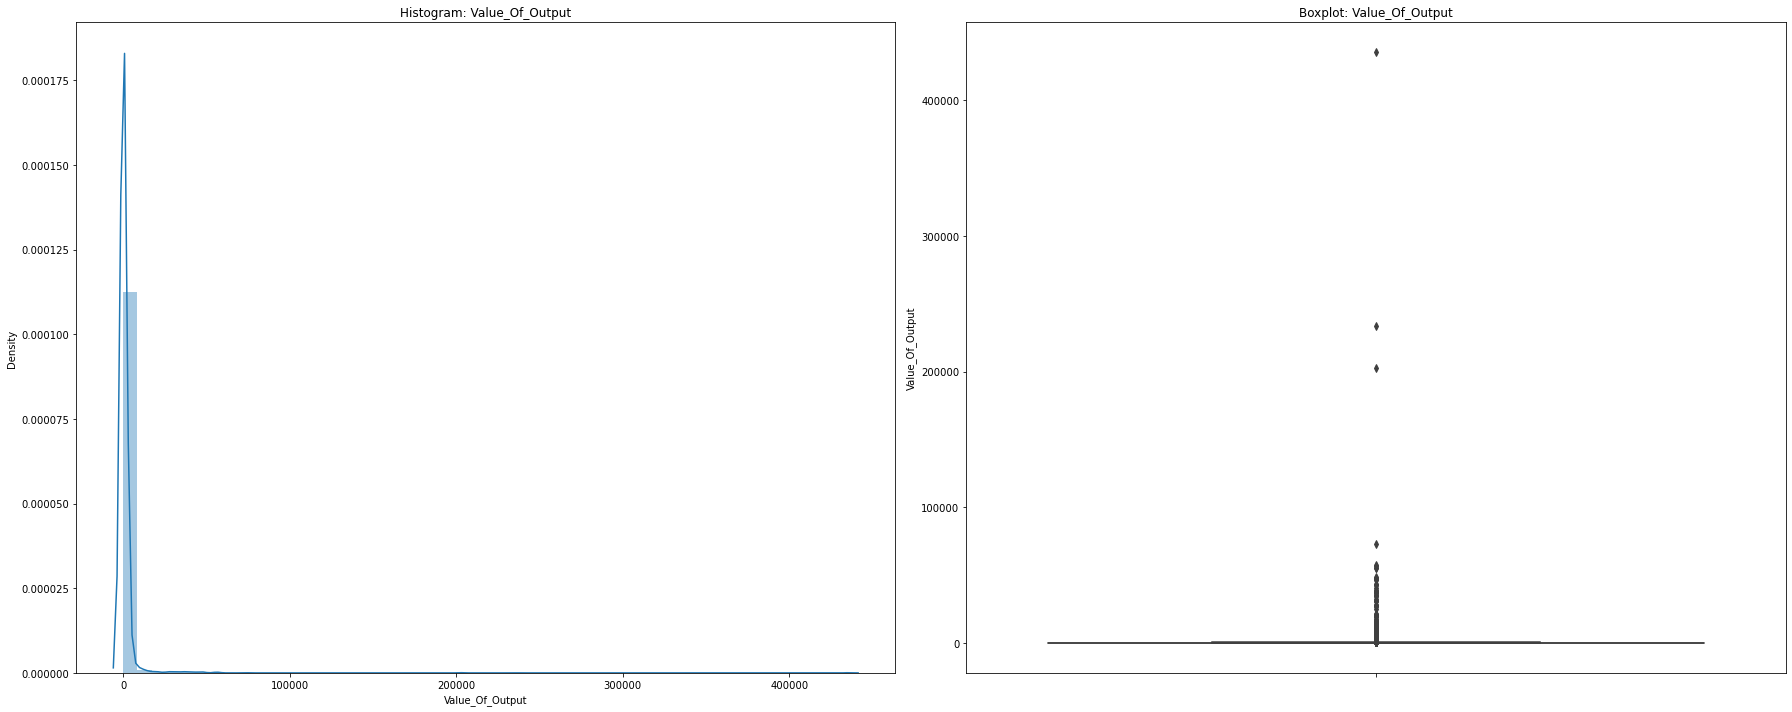

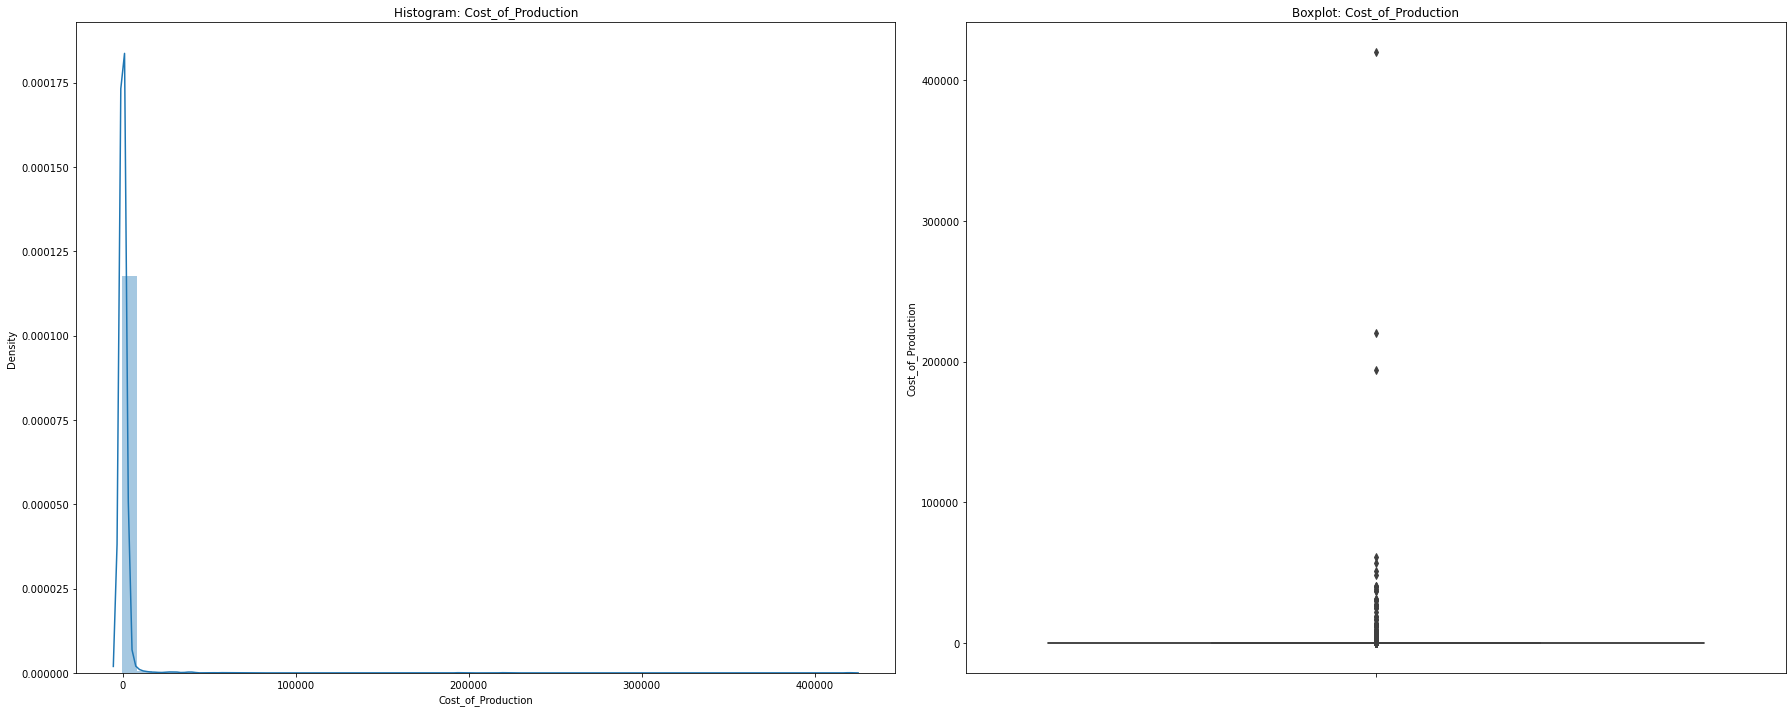

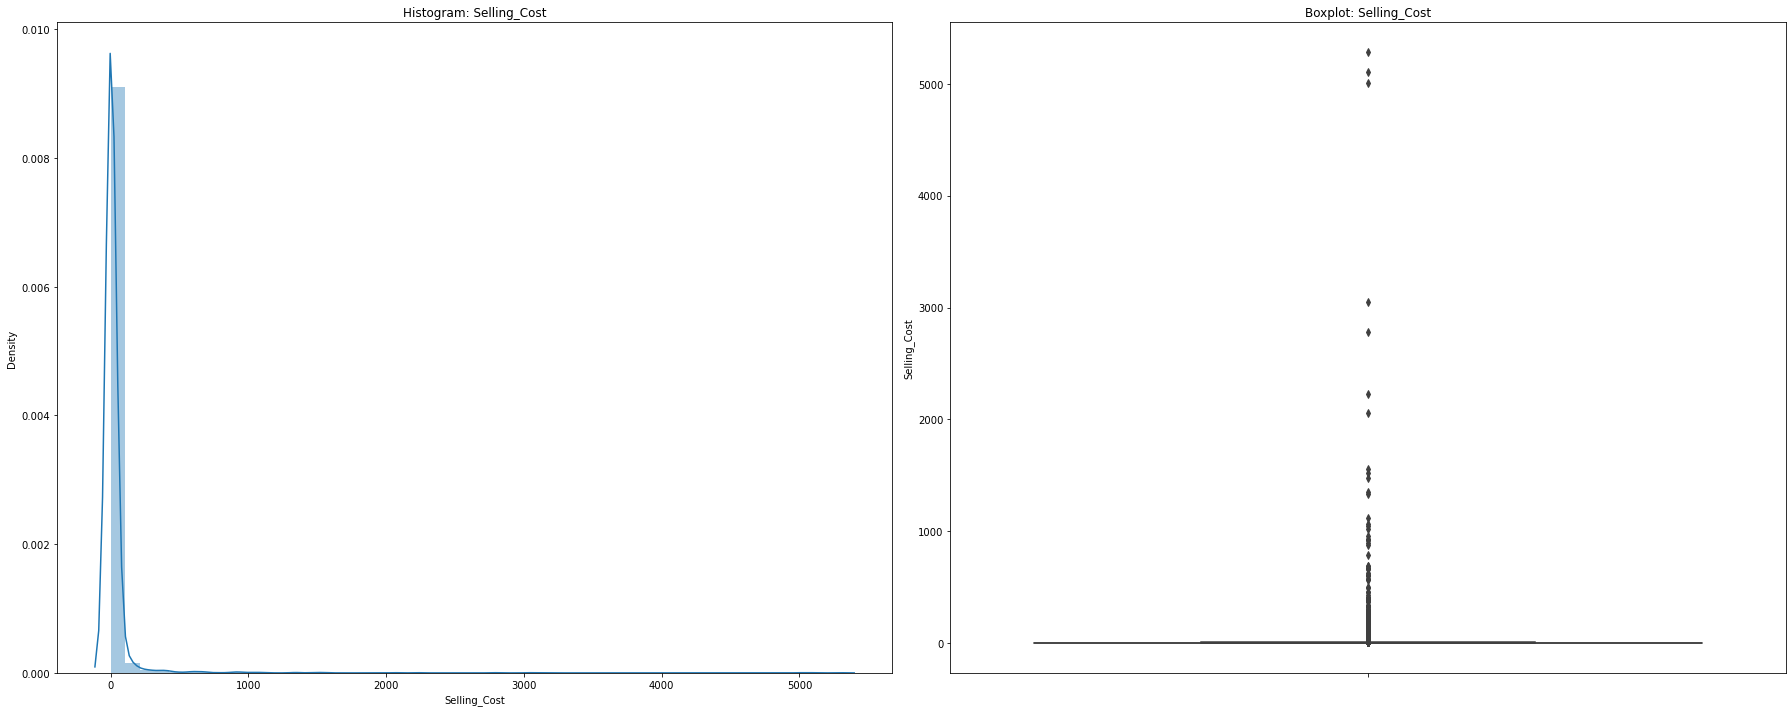

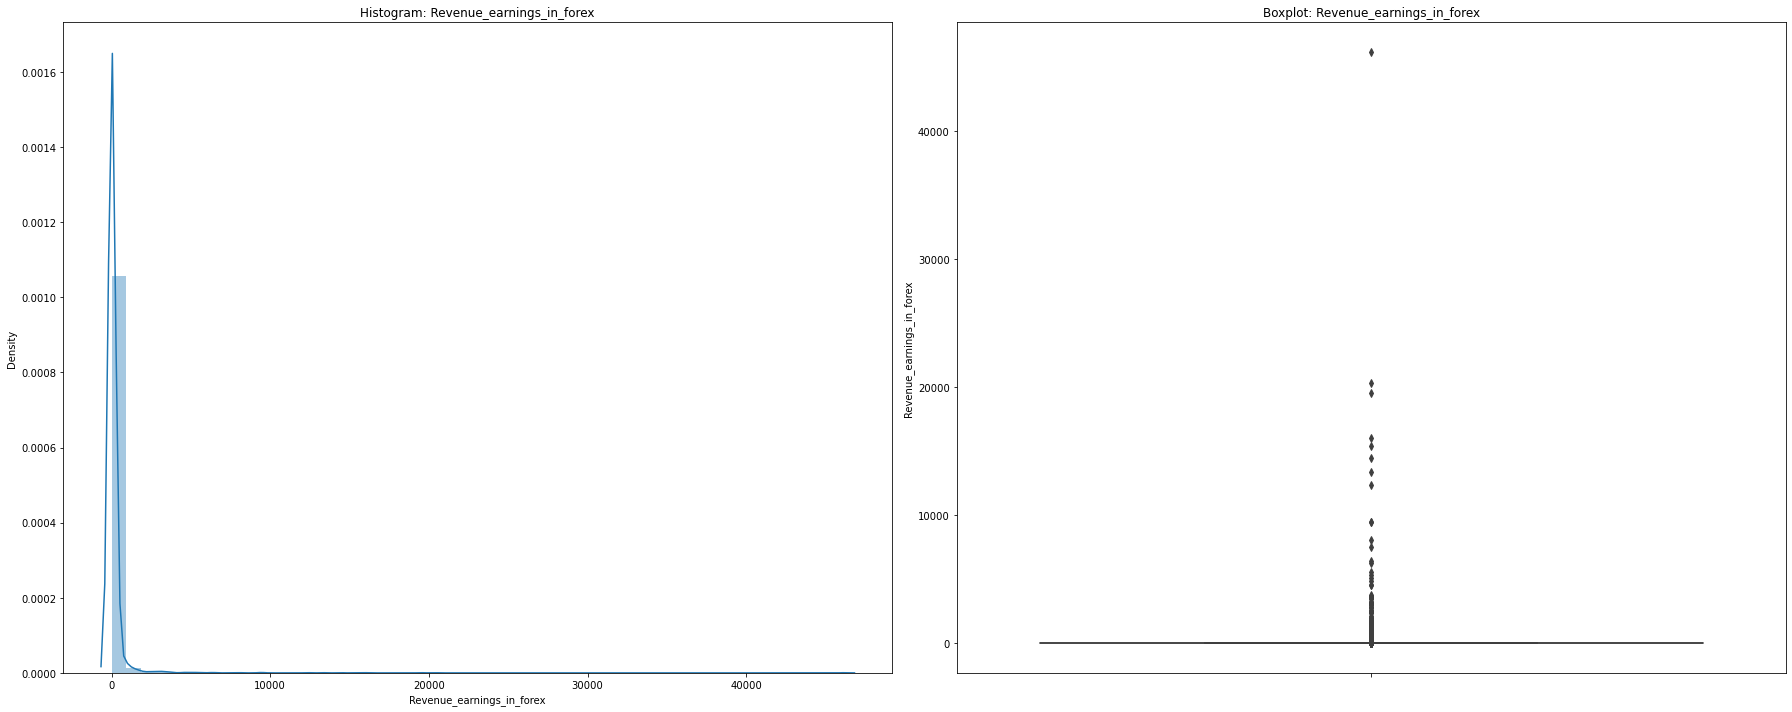

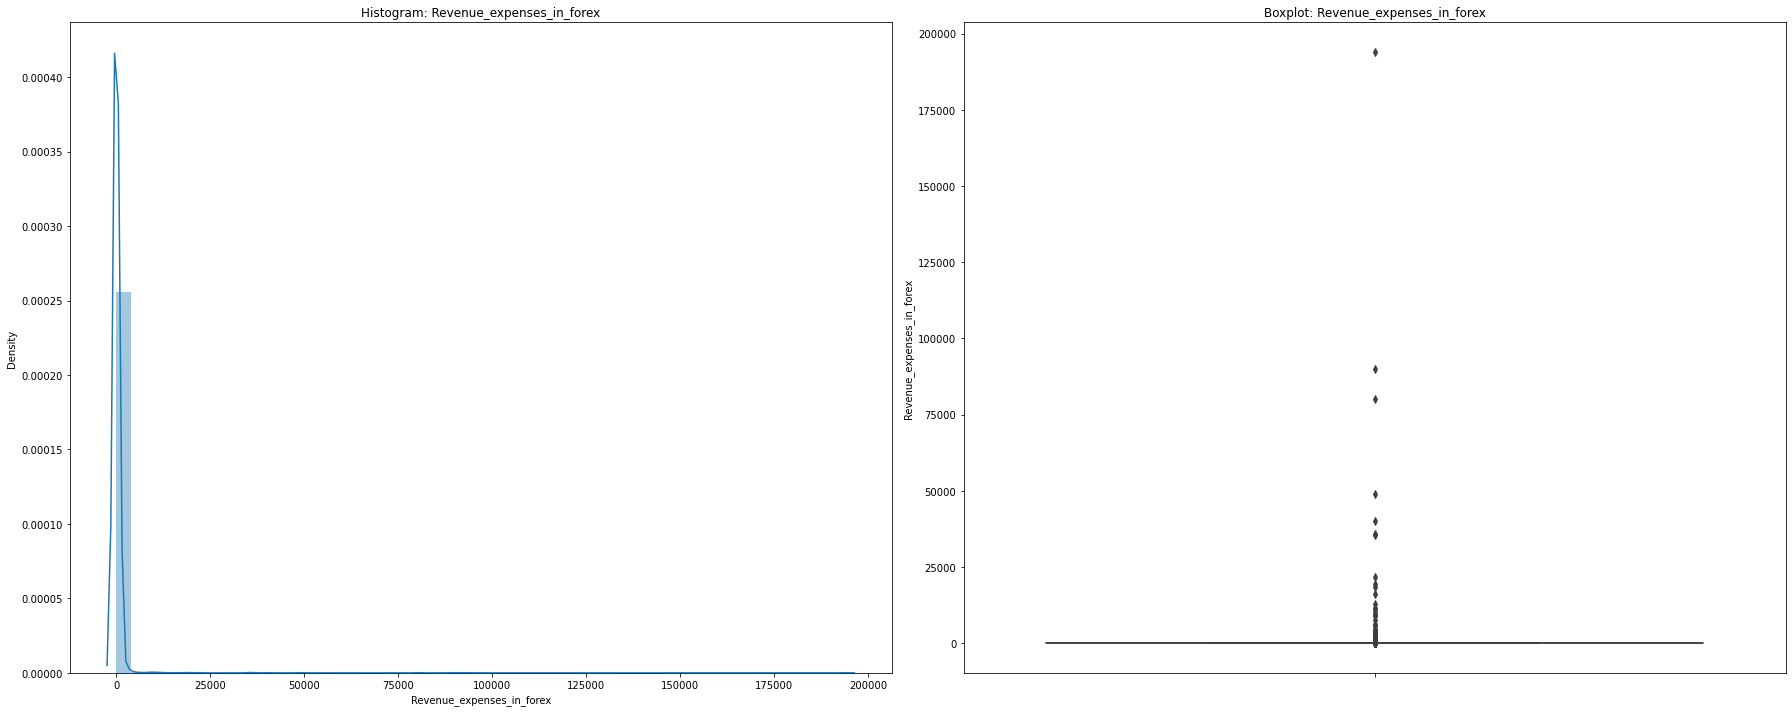

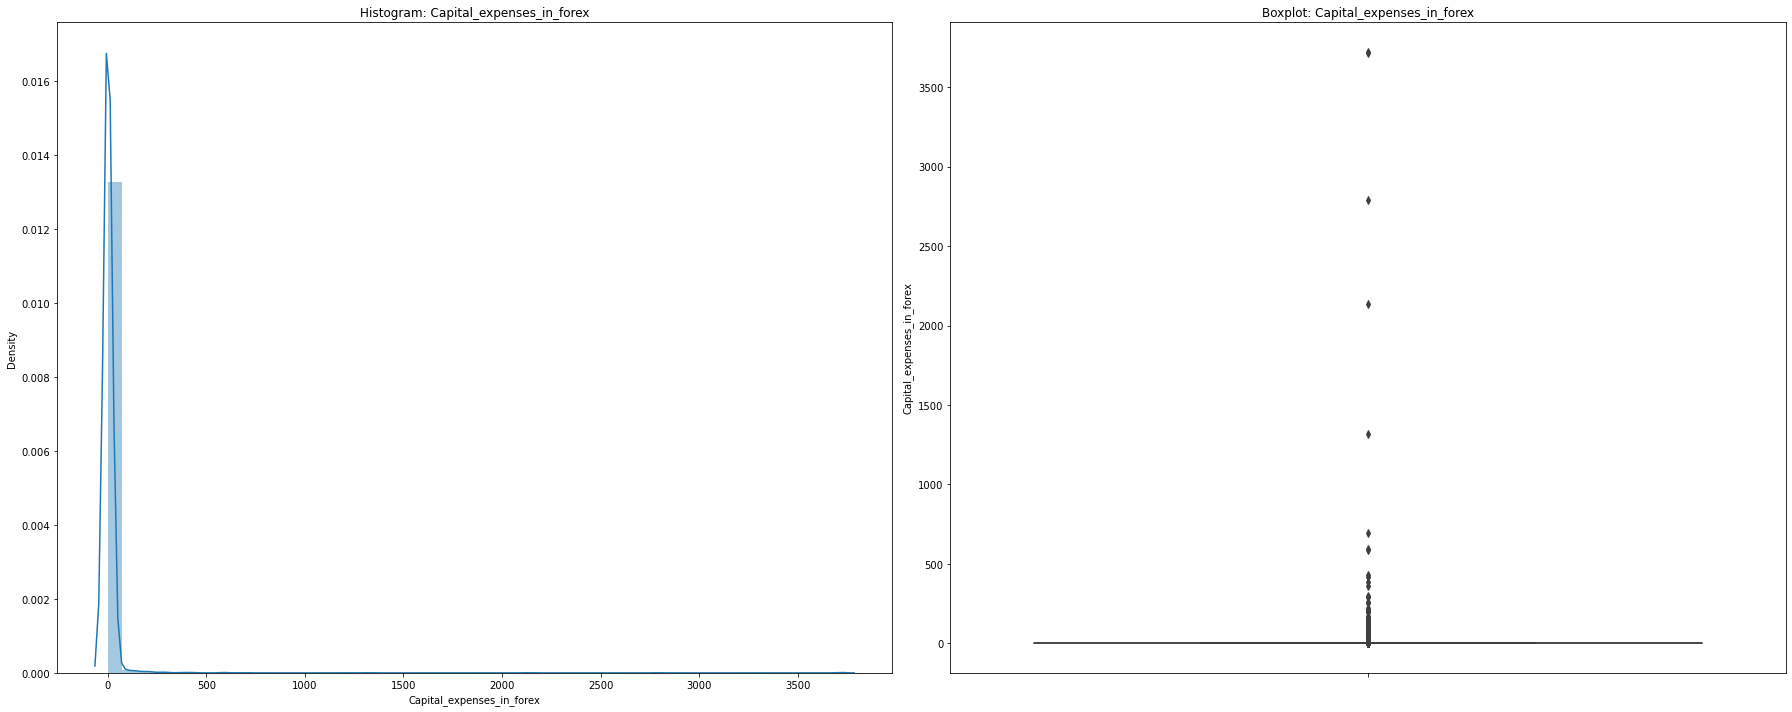

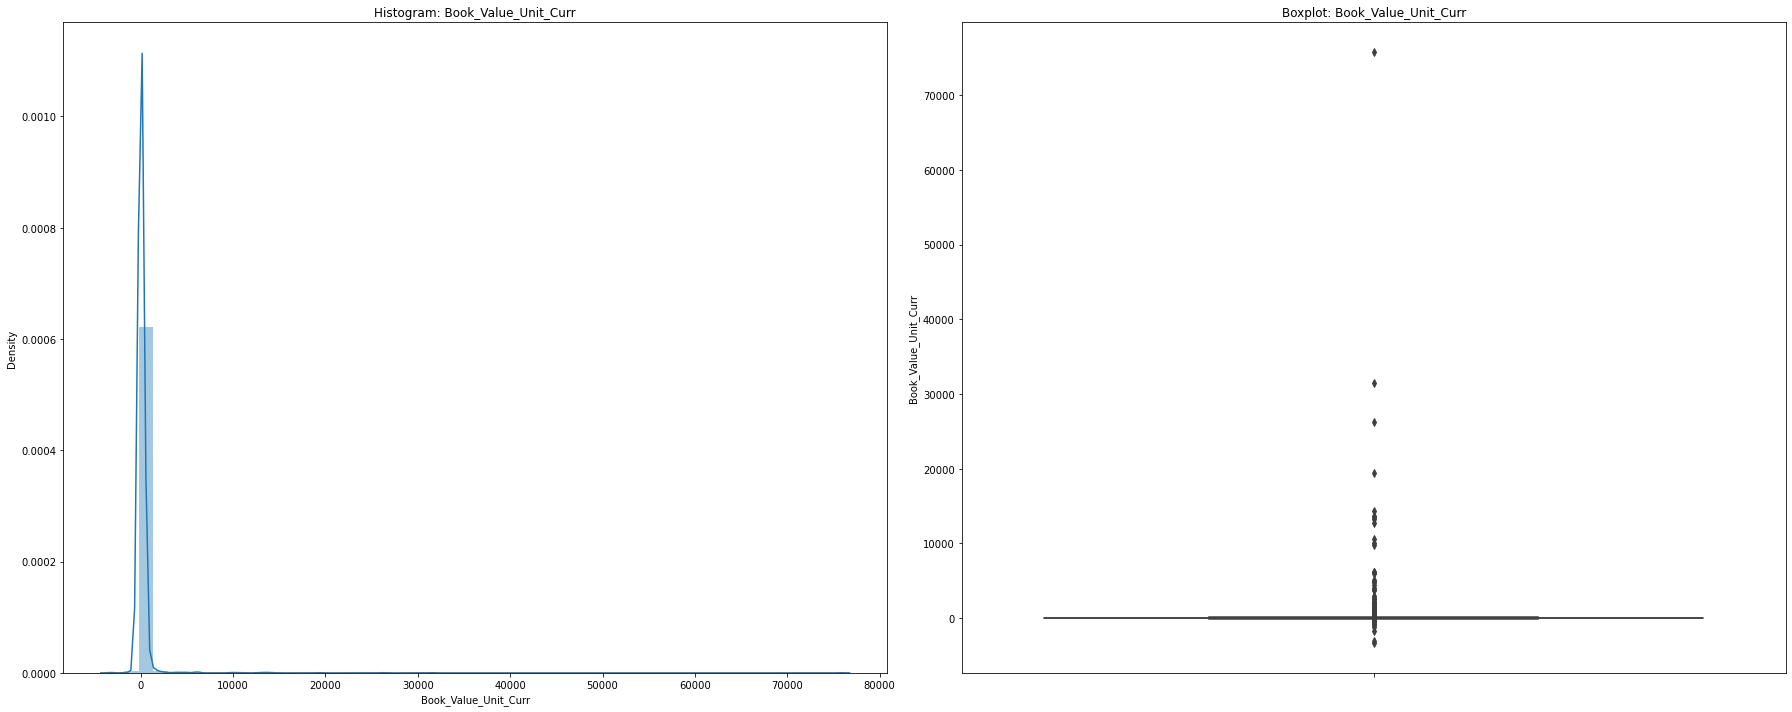

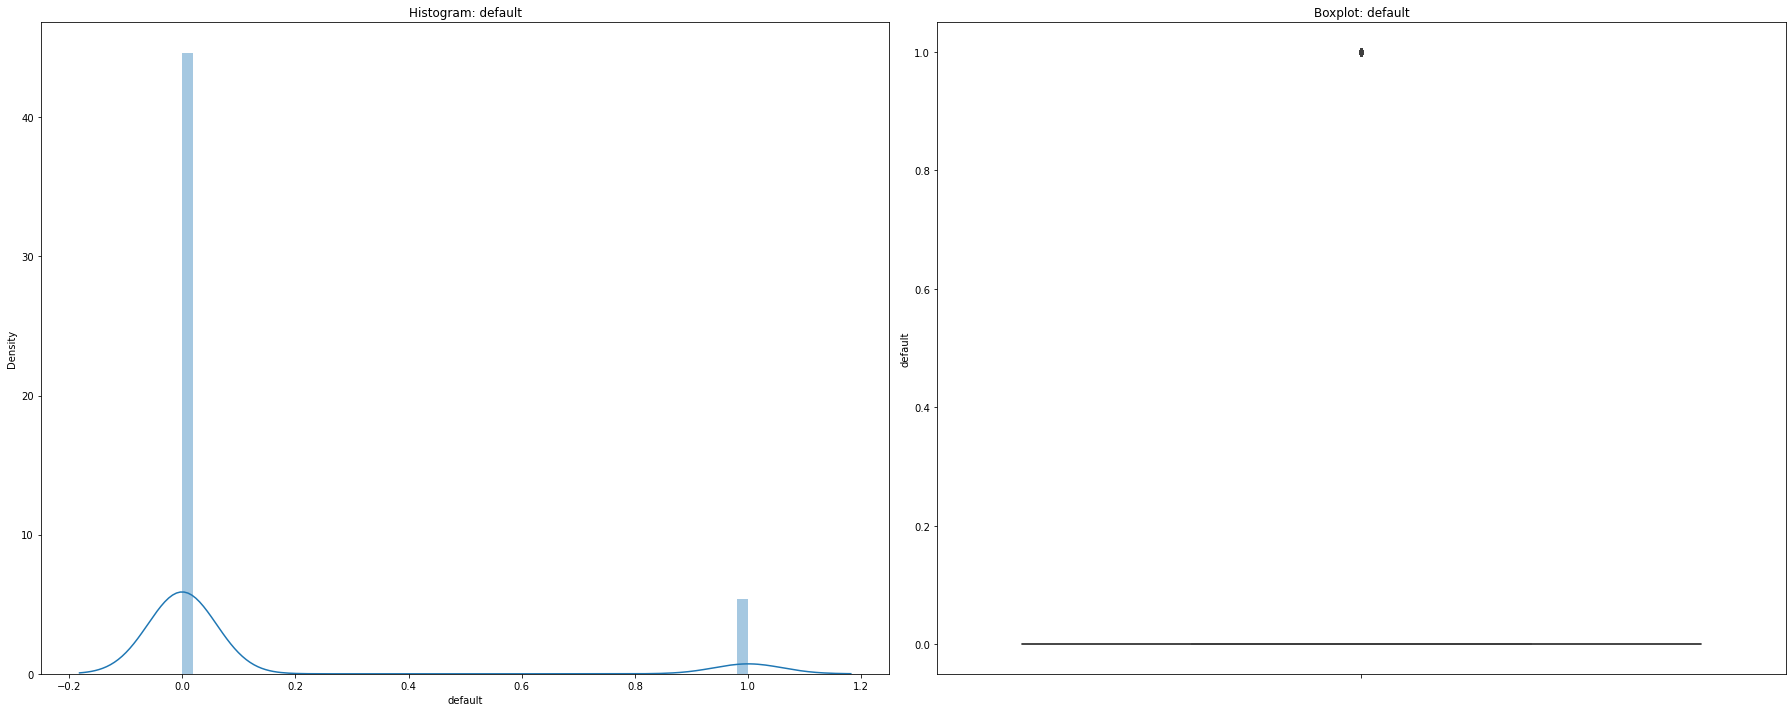

In [22]:
for i in Company_EDA.columns:
    if Company_EDA[i].dtype not in ['object']:
        plt.figure(figsize = (25,10));
        plt.subplot(1,2,1);
        sns.distplot(Company_EDA[i]);
        plt.title('Histogram: {}'.format(i));
        plt.subplot(1,2,2);
        sns.boxplot(y=Company_EDA[i],data=Company_EDA);
        plt.title('Boxplot: {}'.format(i));                
        plt.tight_layout();

Text(0.5, 1.0, 'Correlation Heatmap')

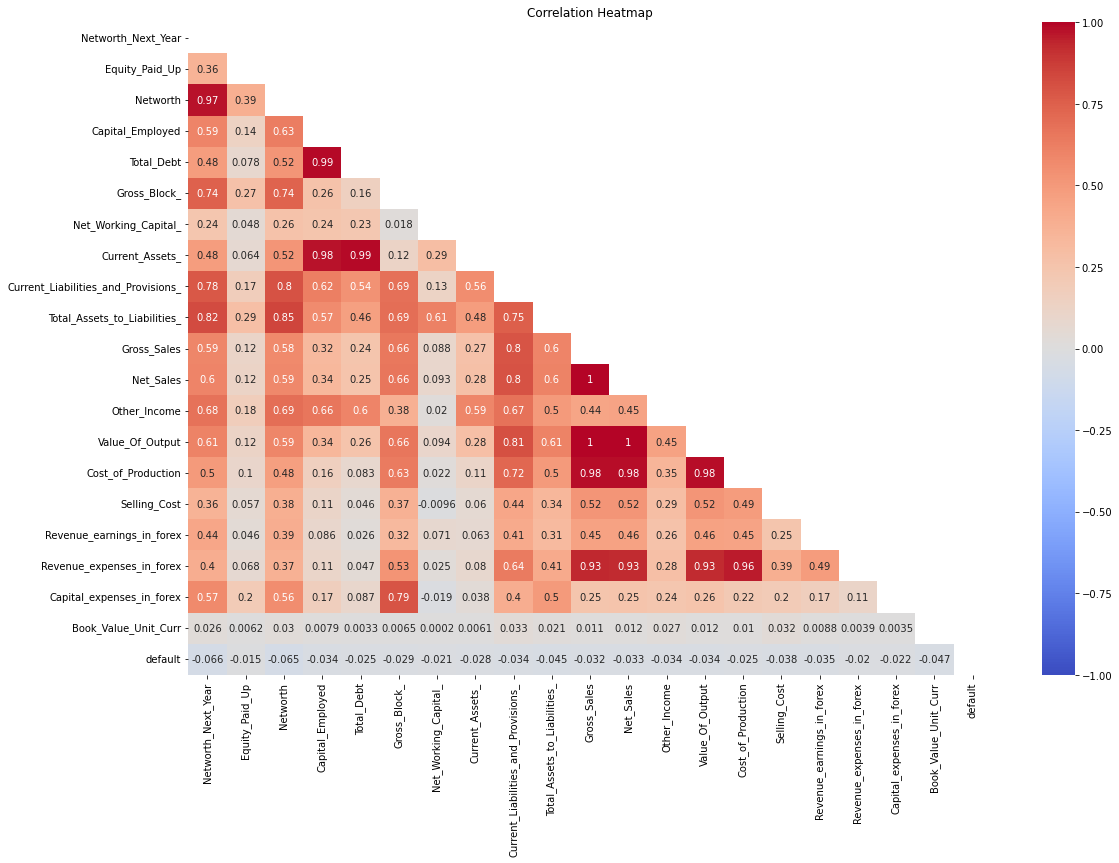

In [23]:
plt.figure(figsize=(18,12))
corr = Company_EDA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
corr_tab = sns.heatmap(corr,annot=True,vmin=-1,vmax = 1,mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap')

In [24]:
Company_EDA['Defaulter'] = np.where((Company['Networth_Next_Year'] > 0), 'No', 'Yes')

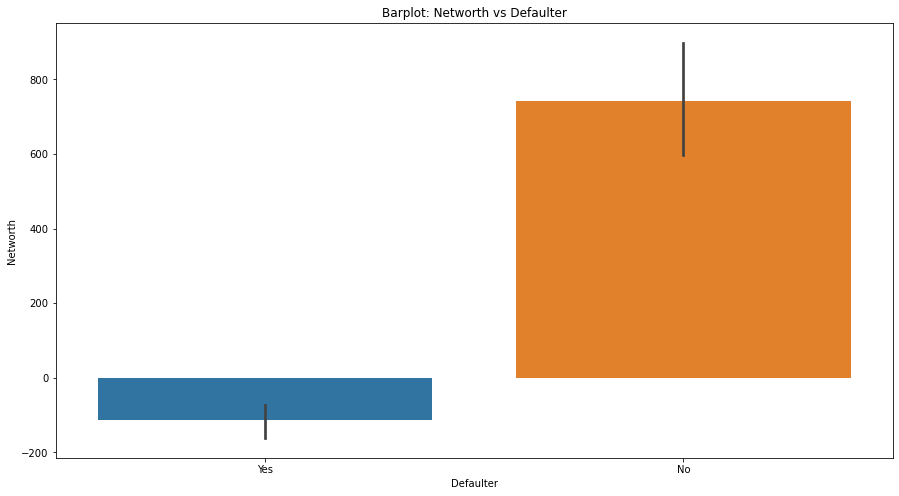

In [25]:
plt.figure(figsize = (15,8));
sns.barplot(data=Company_EDA,y='Networth',x='Defaulter');
plt.title('Barplot: Networth vs Defaulter');

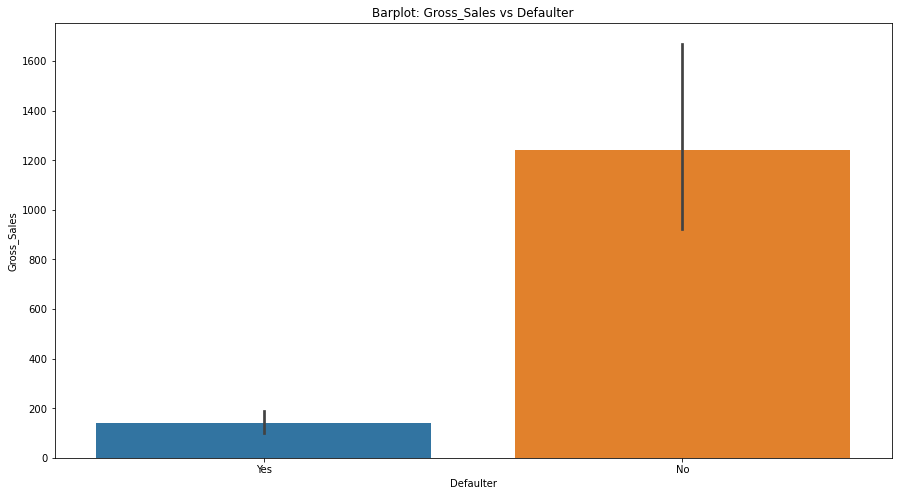

In [26]:
plt.figure(figsize = (15,8));
sns.barplot(data=Company_EDA,y='Gross_Sales',x='Defaulter')
plt.title('Barplot: Gross_Sales vs Defaulter');

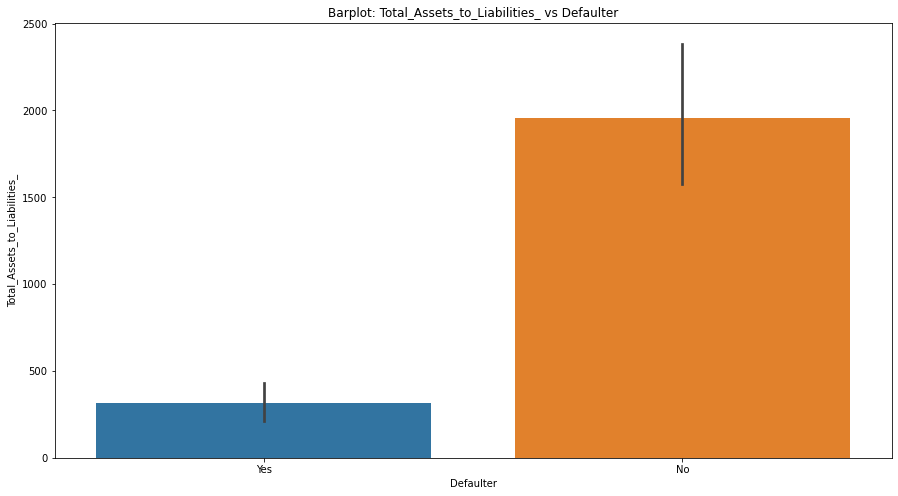

In [27]:
plt.figure(figsize = (15,8));
sns.barplot(data=Company_EDA,y='Total_Assets_to_Liabilities_',x='Defaulter');
plt.title('Barplot: Total_Assets_to_Liabilities_ vs Defaulter');

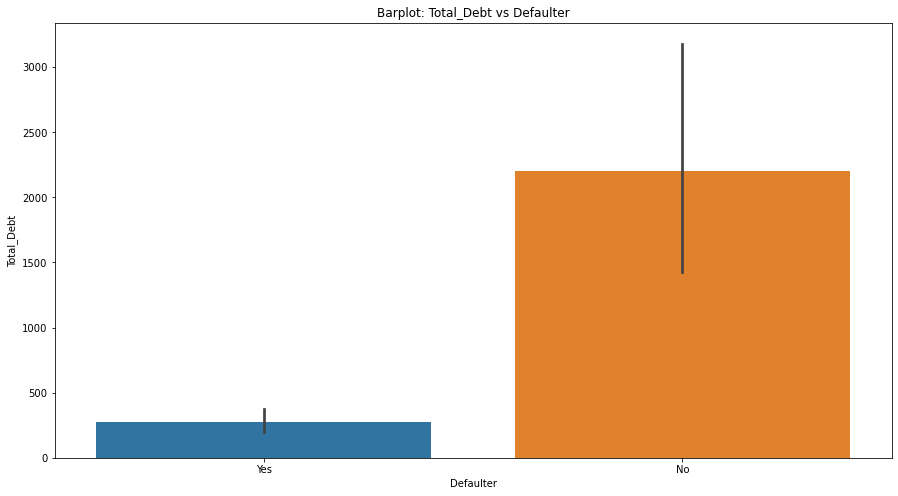

In [28]:
plt.figure(figsize = (15,8));
sns.barplot(data=Company_EDA,y='Total_Debt',x='Defaulter');
plt.title('Barplot: Total_Debt vs Defaulter');

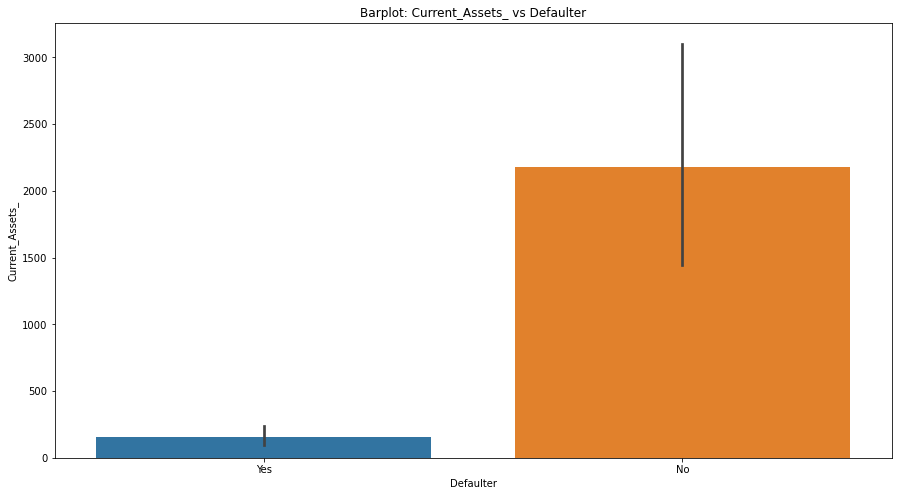

In [29]:
plt.figure(figsize = (15,8));
sns.barplot(data=Company_EDA,y='Current_Assets_',x='Defaulter');
plt.title('Barplot: Current_Assets_ vs Defaulter');

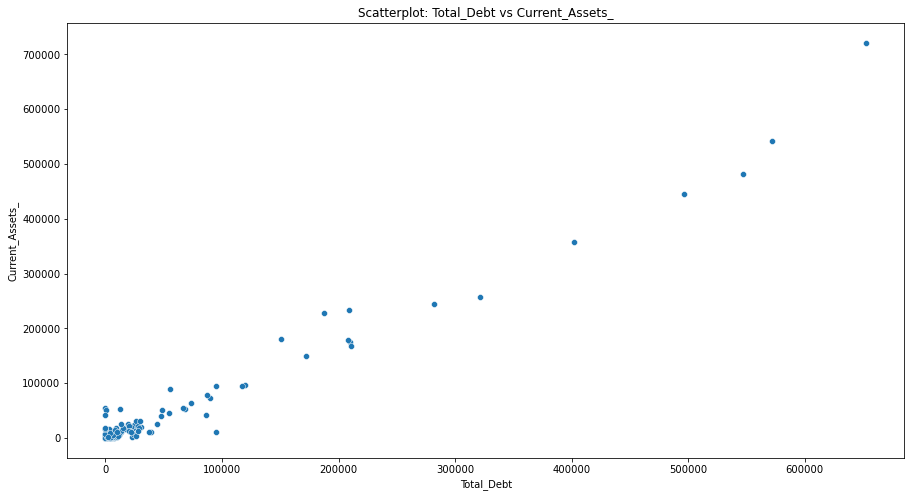

In [30]:
plt.figure(figsize = (15,8));
sns.scatterplot(data=Company_EDA,x='Total_Debt',y='Current_Assets_')
plt.title('Scatterplot: Total_Debt vs Current_Assets_');

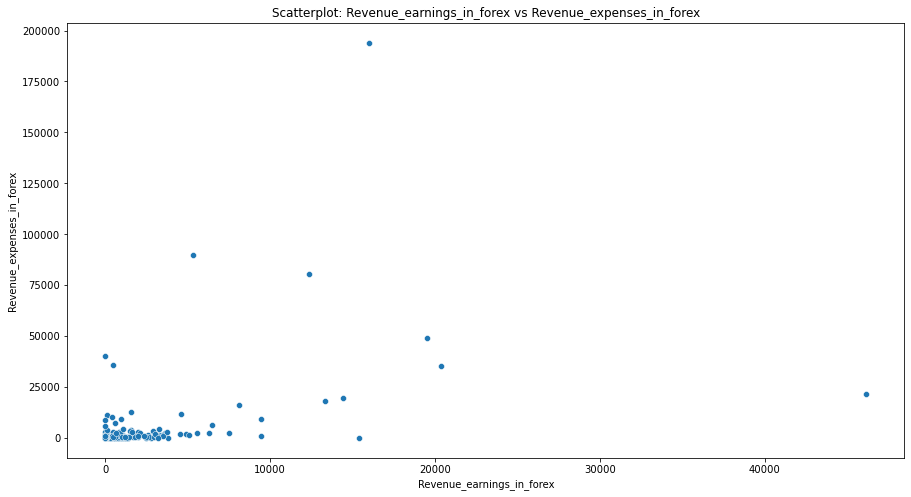

In [31]:
plt.figure(figsize = (15,8));
sns.scatterplot(data=Company_EDA,x='Revenue_earnings_in_forex',y='Revenue_expenses_in_forex')
plt.title('Scatterplot: Revenue_earnings_in_forex vs Revenue_expenses_in_forex');

In [32]:
Company.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [33]:
Company.isnull().sum().sum()

118

In [34]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

#### Outlier Treatment

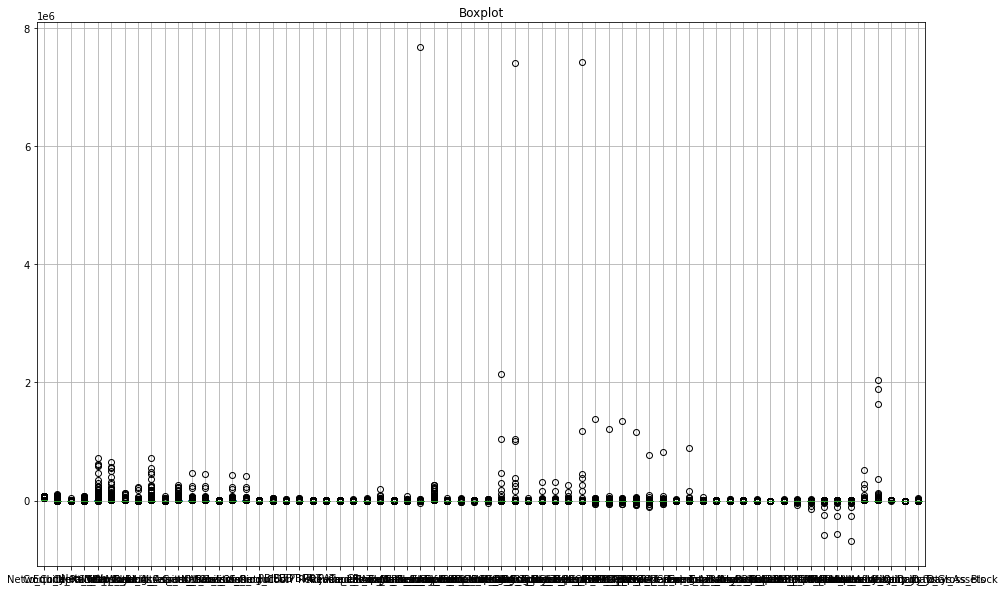

In [35]:
plt.figure(figsize = (35, 10))
plt.subplot(1,2,1)
Company_X.boxplot();
plt.title("Boxplot");

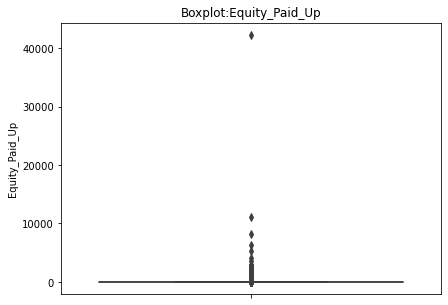

In [36]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y=Company_X['Equity_Paid_Up']);
plt.title("Boxplot:Equity_Paid_Up");

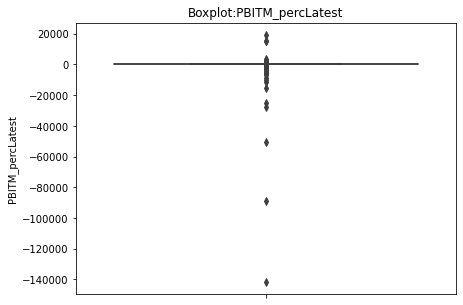

In [37]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y=Company_X['PBITM_percLatest']);
plt.title("Boxplot:PBITM_percLatest");

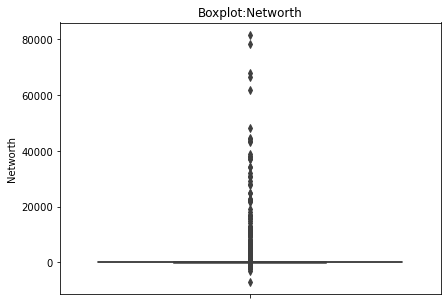

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y=Company_X['Networth']);
plt.title("Boxplot:Networth");

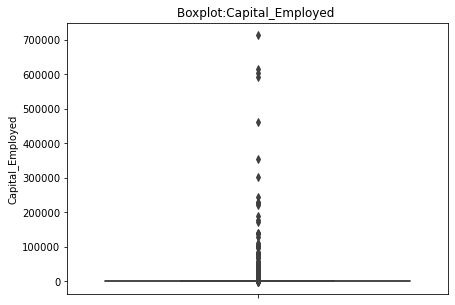

In [39]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y=Company_X['Capital_Employed']);
plt.title("Boxplot:Capital_Employed ");

In [40]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [41]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM_percLatest                   933
Adjusted_PAT                       954
Book_Value_Adj_Unit_Curr           486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 67, dtype: int64

In [42]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [43]:
Company_X.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [44]:
Company_X.isnull().sum().sum()

42440

In [45]:
Company_X = Company_X.drop(['Co_Code', 'Networth_Next_Year','Co_Name'], axis = 1)

In [46]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

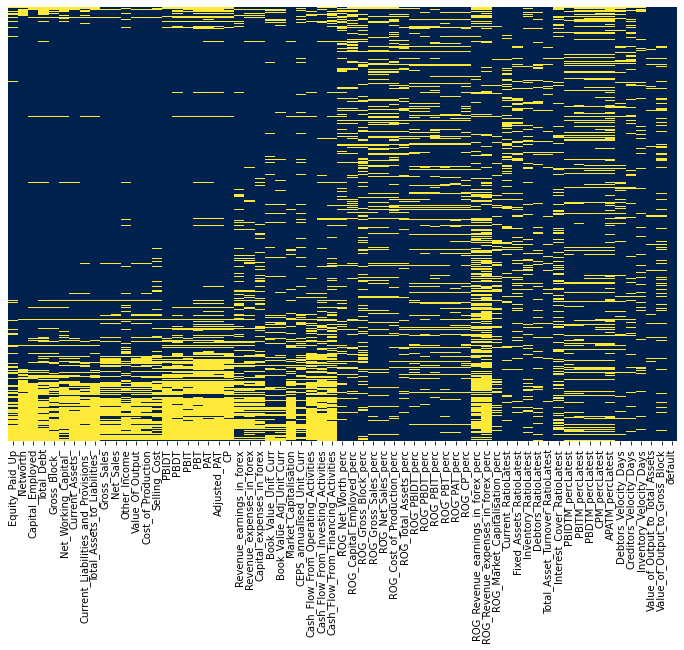

In [47]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'cividis', yticklabels = False)
plt.show()

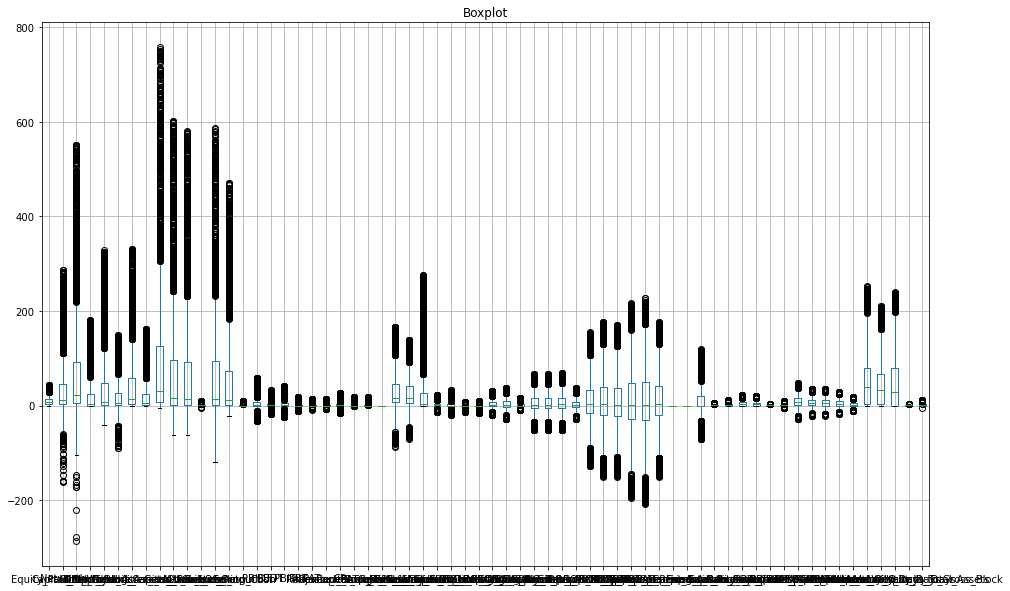

In [48]:
plt.figure(figsize = (35, 10))
plt.subplot(1,2,1)
Company_X.boxplot();
plt.title("Boxplot");

### 1.2 Missing Value Treatment

In [49]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [50]:
Company_sub1.isnull().sum(axis = 1).min()

0

In [51]:
Company_sub1.isnull().sum(axis = 1).max()

45

In [52]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [53]:
Company_sub1_temp.shape

(1203, 65)

In [54]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [55]:
118/388

0.30412371134020616

In [56]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [57]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG_Revenue_expenses_in_forex_perc    0.45
ROG_Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Debtors_RatioLatest                   0.10
Inventory_Velocity_Days               0.10
Total_Asset_Turnover_RatioLatest      0.06
Value_of_Output_to_Total_Assets       0.04
default                               0.00
Length: 65, dtype: float64

In [58]:
#Dropping columns with more than 30% missing values

Company_sub2 = Company_sub1.drop(['ROG_Revenue_expenses_in_forex_perc', 'ROG_Revenue_earnings_in_forex_perc'],
                           axis = 1)

In [59]:
Company_sub2.shape

(3586, 63)

In [60]:
#Segregate the predictors and response

predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [61]:
predictors

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,NaN,NaN,NaN,NaN,NaN,NaN,40.50,NaN,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.30,NaN,NaN,NaN,NaN,29.00,101.00,2.00,0.31,0.24
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.13,...,NaN,NaN,NaN,NaN,NaN,97.00,NaN,0.00,-0.03,-0.26
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.33,-7.21,NaN,NaN,NaN,93.00,63.00,2.00,0.24,1.90
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.60,7.76
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.92,32.17,29.81,NaN,NaN,13.00,53.00,77.00,0.29,1.00
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.09,6.69,7.31,5.69,4.29,7.00,30.00,48.00,1.42,3.24
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.12,20.55,23.39,19.55,11.99,32.00,69.00,42.00,0.36,0.68


In [62]:
# Scale the predictors


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [63]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [64]:
#Imputing the remaining missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)
Company_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
default                            0
Length: 63, dtype: int64

<AxesSubplot:>

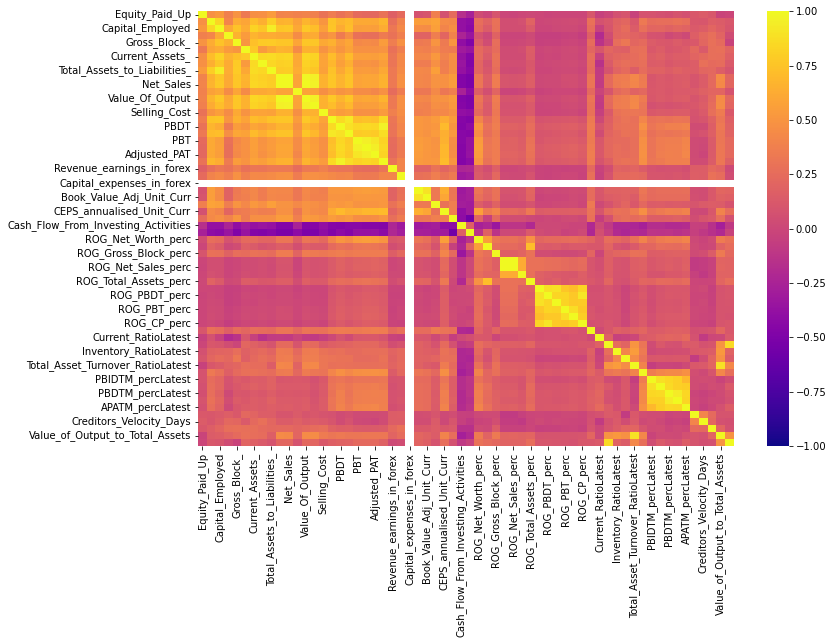

In [65]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix,cmap='plasma', vmin = -1, vmax= 1)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Company_imputed.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Company_imputed.values, i)
                          for i in range(len(Company_imputed.columns))]
  


In [67]:
vif_data.sort_values(by='VIF',ascending=True).head(50)

,feature,VIF
45,ROG_Market_Capitalisation_perc,1.29
59,Inventory_Velocity_Days,1.29
46,Current_RatioLatest,1.30
22,Revenue_earnings_in_forex,1.38
57,Debtors_Velocity_Days,1.39
58,Creditors_Velocity_Days,1.41
34,ROG_Gross_Block_perc,1.42
62,default,1.44
49,Debtors_RatioLatest,1.60
23,Revenue_expenses_in_forex,1.63


In [68]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve

### 1.5 Train Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42,stratify=response)

In [71]:
y_train.value_counts(normalize=True)

0.00   0.89
1.00   0.11
Name: default, dtype: float64

In [72]:
y_train.sum()

260.0

In [73]:
y_test.sum()

128.0

In [74]:
y_test.value_counts(normalize=True)

0.00   0.89
1.00   0.11
Name: default, dtype: float64

In [75]:
import statsmodels.formula.api as SM

In [76]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [77]:
f_1 = 'default ~ ROG_Market_Capitalisation_perc + Inventory_Velocity_Days + Current_RatioLatest + Revenue_earnings_in_forex + Debtors_Velocity_Days + Creditors_Velocity_Days + ROG_Gross_Block_perc + Debtors_RatioLatest + Revenue_expenses_in_forex + Inventory_RatioLatest + Cash_Flow_From_Investing_Activities + Equity_Paid_Up + ROG_Cost_of_Production_perc + Interest_Cover_RatioLatest + Market_Capitalisation + Other_Income + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + Selling_Cost + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Total_Debt + ROG_Capital_Employed_perc + CEPS_annualised_Unit_Curr + Net_Working_Capital_ + Value_of_Output_to_Gross_Block + Fixed_Assets_RatioLatest + APATM_percLatest + Gross_Block_ + Book_Value_Adj_Unit_Curr + Networth'

### 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

### Model 1

In [78]:
import statsmodels.formula.api as SM
model_1 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.138159
         Iterations 10


In [79]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5970
Time:                        12:32:06   Log-Likelihood:                -331.86
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.030e-186
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1573      0.281    -18.349      0.000      -5.708      -4.606
ROG_Market_Capitalisation_perc         -0.1409      0.122     -1.153      0.249      -0.380       0.099
Inventory_Velocity_Days                -0.1520      0.128     -1.185      0.236      -0.403       0.099
Current_RatioLatest                    -1.2142      0.168     -7.219      0.000      -1.544      -0.885
Revenue_earnings_in_forex              -0.3870      0.174     -2.225      0.026      -0.728      -0.046
Debtors_Velocity_Days                   0.2060      0.117      1.761      0.078      -0.023       0.435
Creditors_Velocity_Days                 0.1787      0.106      1.684      0.092      -0.029       0.387
ROG_Gross_Block_perc                   -0.2805      0.178     -1.574      0.115      -0.630       0.069
Debtors_RatioLatest                    -0.0124      0.133     -0.093      0.926      -0.273       0.248
Revenue_expenses_in_forex               0.2138      0.166      1.289      0.198      -0.111       0.539
Inventory_RatioLatest                  -0.1763      0.155     -1.138      0.255      -0.480       0.127
Cash_Flow_From_Investing_Activities    -0.0410      0.161     -0.255      0.799      -0.357       0.275
Equity_Paid_Up                          0.1078      0.141      0.767      0.443      -0.168       0.383
ROG_Cost_of_Production_perc            -0.4064      0.125     -3.248      0.001      -0.652      -0.161
Interest_Cover_RatioLatest             -0.5883      0.180     -3.272      0.001      -0.941      -0.236
Market_Capitalisation                  -0.1834      0.193     -0.950      0.342      -0.562       0.195
Other_Income                            0.3431      0.166      2.063      0.039       0.017       0.669
Cash_Flow_From_Financing_Activities    -0.2610      0.167     -1.566      0.117      -0.588       0.066
Cash_Flow_From_Operating_Activities    -0.2186      0.191     -1.143      0.253      -0.594       0.156
Selling_Cost                            0.2767      0.191      1.446      0.148      -0.098       0.652
ROG_Net_Worth_perc                     -0.3709      0.149     -2.490      0.013      -0.663      -0.079
ROG_Total_Assets_perc                  -0.0007      0.156     -0.004      0.996      -0.307       0.305
Total_Debt                              0.2318      0.201      1.152      0.249      -0.163       0.626
ROG_Capital_Employed_perc               0.2548      0.162      1.571      0.116      -0.063       0.573
CEPS_annualised_Unit_Curr              -0.1348      0.207     -0.653      0.514      -0.540       0.270
Net_Working_Capital_                   -0.0589      0.197     -0.299      0.765      -0.444       0.327
Value_of_Output_to_Gross_Block          0.2272      0.250      0.909      0.364      -0.263       0.717
Fixed_Assets_RatioLatest               -0.4378      0.305     -1.436      0.151      -1.035       0.160
APATM_percLatest 

### 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

### Validating the model on train set

In [80]:
y_pred_train = np.where(model_1.predict(train) > 0.5, 1, 0)

In [81]:
print(confusion_matrix(y_train, y_pred_train))

[[2112   30]
 [  87  173]]


In [82]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2142
         1.0       0.85      0.67      0.75       260

    accuracy                           0.95      2402
   macro avg       0.91      0.83      0.86      2402
weighted avg       0.95      0.95      0.95      2402



### Validating the model on test set

In [83]:
y_pred_test = np.where(model_1.predict(test) > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[1038   18]
 [  52   76]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1056
         1.0       0.81      0.59      0.68       128

    accuracy                           0.94      1184
   macro avg       0.88      0.79      0.83      1184
weighted avg       0.94      0.94      0.94      1184



In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)

The ROC_AUC score for LR model-1 on testing data is 0.7272727272727273


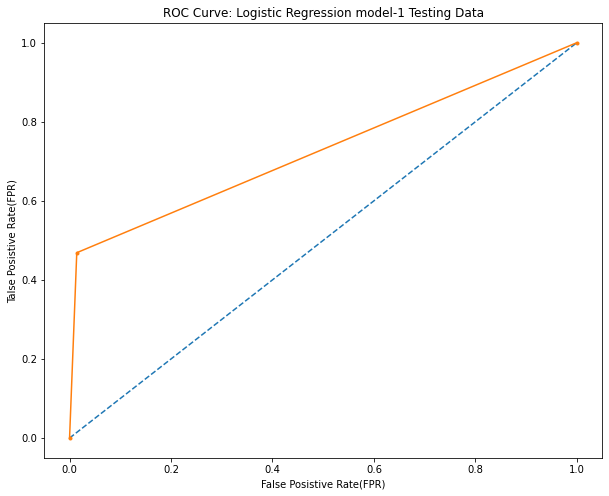

In [170]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 1
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model-1 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LR model-1 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test)))

### Model 2 - relevant features from model 1

In [85]:
f_1 = 'default ~ Current_RatioLatest + Revenue_earnings_in_forex + ROG_Cost_of_Production_perc + Interest_Cover_RatioLatest + Other_Income + ROG_Net_Worth_perc + Gross_Block_ + Book_Value_Adj_Unit_Curr + Networth'
import statsmodels.formula.api as SM
model_2 = SM.logit(formula = f_1, data= train).fit()

Optimization terminated successfully.
         Current function value: 0.144088
         Iterations 9


In [86]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5797
Time:                        12:32:20   Log-Likelihood:                -346.10
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.883e-200
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.8539      0.249    -19.490      0.000      -5.342      -4.366
Current_RatioLatest            -1.2241      0.155     -7.901      0.000      -1.528      -0.920
Revenue_earnings_in_forex      -0.2730      0.151     -1.810      0.070      -0.569       0.023
ROG_Cost_of_Production_perc    -0.4581      0.117     -3.901      0.000      -0.688      -0.228
Interest_Cover_RatioLatest     -0.6856      0.153     -4.468      0.000      -0.986      -0.385
Other_Income                    0.3959      0.149      2.654      0.008       0.103       0.688
ROG_Net_Worth_perc             -0.2798      0.122     -2.285      0.022      -0.520      -0.040
Gross_Block_                    0.9381      0.155      6.065      0.000       0.635       1.241
Book_Value_Adj_Unit_Curr       -2.9614      0.275    -10.751      0.000      -3.501      -2.421
Networth                       -1.4125      0.239     -5.915      0.000      -1.881      -0.944
===============================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Validating the model on train set

In [87]:
y_pred_train = np.where(model_2.predict(train) > 0.5, 1, 0)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[2116   26]
 [  87  173]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2142
         1.0       0.87      0.67      0.75       260

    accuracy                           0.95      2402
   macro avg       0.91      0.83      0.86      2402
weighted avg       0.95      0.95      0.95      2402



### Validating the model on test set

In [88]:
y_pred_test = np.where(model_2.predict(test) > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[1040   16]
 [  49   79]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1056
         1.0       0.83      0.62      0.71       128

    accuracy                           0.95      1184
   macro avg       0.89      0.80      0.84      1184
weighted avg       0.94      0.95      0.94      1184



The ROC_AUC score for LDA model-2 on testing data is 0.7272727272727273


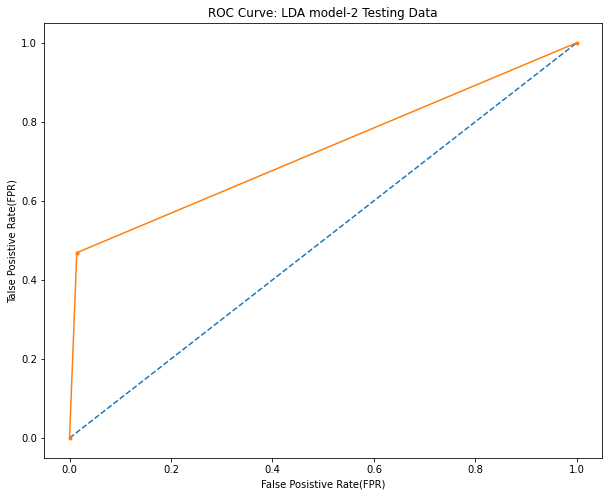

In [175]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 2
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model-2 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model-2 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test)))

### Model 3 on balanced data via SMOTE

In [90]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [91]:
train_smote = pd.concat([X_res, y_res], axis = 1)
f_1 = 'default ~ ROG_Market_Capitalisation_perc + Inventory_Velocity_Days + Current_RatioLatest + Revenue_earnings_in_forex + Debtors_Velocity_Days + Creditors_Velocity_Days + ROG_Gross_Block_perc + Debtors_RatioLatest + Revenue_expenses_in_forex + Inventory_RatioLatest + Cash_Flow_From_Investing_Activities + Equity_Paid_Up + ROG_Cost_of_Production_perc + Interest_Cover_RatioLatest + Market_Capitalisation + Other_Income + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + Selling_Cost + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Total_Debt + ROG_Capital_Employed_perc + CEPS_annualised_Unit_Curr + Net_Working_Capital_ + Value_of_Output_to_Gross_Block + Fixed_Assets_RatioLatest + APATM_percLatest + Gross_Block_ + Book_Value_Adj_Unit_Curr + Networth'
model_3 = SM.logit(formula = f_1, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.214836
         Iterations 9


In [111]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 4284
Model:                          Logit   Df Residuals:                     4252
Method:                           MLE   Df Model:                           31
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                  0.6901
Time:                        19:34:32   Log-Likelihood:                -920.36
converged:                       True   LL-Null:                       -2969.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.7729      0.159    -23.721      0.000      -4.085      -3.461
ROG_Market_Capitalisation_perc         -0.1218      0.082     -1.478      0.139      -0.283       0.040
Inventory_Velocity_Days                -0.2290      0.088     -2.601      0.009      -0.402      -0.056
Current_RatioLatest                    -1.2838      0.094    -13.649      0.000      -1.468      -1.099
Revenue_earnings_in_forex              -0.3361      0.116     -2.902      0.004      -0.563      -0.109
Debtors_Velocity_Days                   0.1612      0.079      2.041      0.041       0.006       0.316
Creditors_Velocity_Days                 0.1471      0.069      2.118      0.034       0.011       0.283
ROG_Gross_Block_perc                   -0.4282      0.119     -3.589      0.000      -0.662      -0.194
Debtors_RatioLatest                     0.0807      0.086      0.940      0.347      -0.087       0.249
Revenue_expenses_in_forex               0.1720      0.114      1.503      0.133      -0.052       0.396
Inventory_RatioLatest                  -0.2712      0.104     -2.605      0.009      -0.475      -0.067
Cash_Flow_From_Investing_Activities    -0.0315      0.111     -0.284      0.776      -0.248       0.186
Equity_Paid_Up                         -0.0390      0.095     -0.409      0.683      -0.226       0.148
ROG_Cost_of_Production_perc            -0.4527      0.084     -5.417      0.000      -0.616      -0.289
Interest_Cover_RatioLatest             -0.8893      0.125     -7.134      0.000      -1.134      -0.645
Market_Capitalisation                  -0.3635      0.128     -2.836      0.005      -0.615      -0.112
Other_Income                            0.7432      0.111      6.690      0.000       0.525       0.961
Cash_Flow_From_Financing_Activities    -0.2599      0.123     -2.110      0.035      -0.501      -0.019
Cash_Flow_From_Operating_Activities    -0.1614      0.127     -1.274      0.203      -0.410       0.087
Selling_Cost                            0.1235      0.140      0.883      0.377      -0.151       0.398
ROG_Net_Worth_perc                     -0.4789      0.098     -4.896      0.000      -0.671      -0.287
ROG_Total_Assets_perc                   0.1389      0.100      1.387      0.165      -0.057       0.335
Total_Debt                              0.3900      0.141      2.762      0.006       0.113       0.667
ROG_Capital_Employed_perc               0.1086      0.104      1.043      0.297      -0.095       0.313
CEPS_annualised_Unit_Curr               0.3072      0.136      2.256      0.024       0.040       0.574
Net_Working_Capital_                   -0.2617      0.137     -1.909      0.056      -0.530       0.007
Value_of_Output_to_Gross_Block          0.2282      0.157      1.457      0.145      -0.079       0.535
Fixed_Assets_RatioLatest               -0.4895      0.191     -2.561      0.010      -0.864      -0.115
APATM_percLatest 

### Validating the model on train set

In [92]:
y_pred_train_smote = np.where(model_3.predict(train_smote) > 0.5, 1, 0)
print(confusion_matrix(y_res, y_pred_train_smote))
print(classification_report(y_res, y_pred_train_smote))

[[1935  207]
 [ 129 2013]]
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2142
         1.0       0.91      0.94      0.92      2142

    accuracy                           0.92      4284
   macro avg       0.92      0.92      0.92      4284
weighted avg       0.92      0.92      0.92      4284



### Validating the model on test set

In [93]:
y_pred_test_smote = np.where(model_3.predict(test) > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred_test_smote))
print(classification_report(y_test, y_pred_test_smote))

[[936 120]
 [ 18 110]]
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1056
         1.0       0.48      0.86      0.61       128

    accuracy                           0.88      1184
   macro avg       0.73      0.87      0.77      1184
weighted avg       0.93      0.88      0.90      1184



The ROC_AUC score for LR model-3 on testing data is 0.8728693181818181


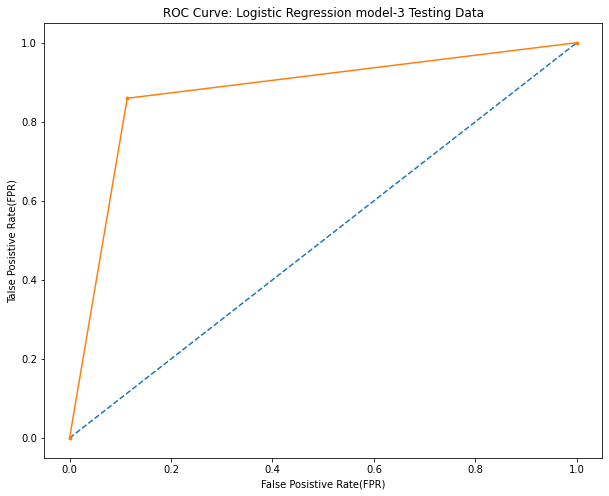

In [94]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 3
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test_smote)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model-3 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LR model-3 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test_smote)))

### Model 4 - relevant features from model 3

In [95]:
f_1 = 'default ~ + Inventory_Velocity_Days + Current_RatioLatest + Revenue_earnings_in_forex + Debtors_Velocity_Days + Creditors_Velocity_Days + ROG_Gross_Block_perc  + Inventory_RatioLatest  + ROG_Cost_of_Production_perc + Interest_Cover_RatioLatest + Market_Capitalisation + Other_Income + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + Total_Debt  + CEPS_annualised_Unit_Curr + Net_Working_Capital_  + Fixed_Assets_RatioLatest  + Gross_Block_ + Book_Value_Adj_Unit_Curr + Networth'
model_4 = SM.logit(formula = f_1, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.216875
         Iterations 9


In [96]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 4284
Model:                          Logit   Df Residuals:                     4263
Method:                           MLE   Df Model:                           20
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.6871
Time:                        12:32:55   Log-Likelihood:                -929.09
converged:                       True   LL-Null:                       -2969.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.6786      0.154    -23.948      0.000      -3.980      -3.378
Inventory_Velocity_Days                -0.1808      0.084     -2.151      0.031      -0.346      -0.016
Current_RatioLatest                    -1.2847      0.093    -13.832      0.000      -1.467      -1.103
Revenue_earnings_in_forex              -0.3279      0.111     -2.944      0.003      -0.546      -0.110
Debtors_Velocity_Days                   0.1529      0.078      1.968      0.049       0.001       0.305
Creditors_Velocity_Days                 0.1614      0.067      2.402      0.016       0.030       0.293
ROG_Gross_Block_perc                   -0.3717      0.116     -3.198      0.001      -0.599      -0.144
Inventory_RatioLatest                  -0.2454      0.094     -2.623      0.009      -0.429      -0.062
ROG_Cost_of_Production_perc            -0.4334      0.080     -5.398      0.000      -0.591      -0.276
Interest_Cover_RatioLatest             -0.8452      0.114     -7.434      0.000      -1.068      -0.622
Market_Capitalisation                  -0.3366      0.122     -2.760      0.006      -0.576      -0.098
Other_Income                            0.7561      0.108      7.014      0.000       0.545       0.967
Cash_Flow_From_Financing_Activities    -0.1097      0.104     -1.056      0.291      -0.313       0.094
ROG_Net_Worth_perc                     -0.3913      0.088     -4.451      0.000      -0.564      -0.219
Total_Debt                              0.4146      0.139      2.980      0.003       0.142       0.687
CEPS_annualised_Unit_Curr               0.3351      0.132      2.546      0.011       0.077       0.593
Net_Working_Capital_                   -0.1948      0.133     -1.462      0.144      -0.456       0.066
Fixed_Assets_RatioLatest               -0.2583      0.114     -2.264      0.024      -0.482      -0.035
Gross_Block_                            1.2433      0.140      8.850      0.000       0.968       1.519
Book_Value_Adj_Unit_Curr               -3.6150      0.188    -19.215      0.000      -3.984      -3.246
Networth                               -1.5126      0.158     -9.600      0.000      -1.821      -1.204
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Validating the model on train set

In [97]:
y_pred_train_smote = np.where(model_4.predict(train_smote) > 0.5, 1, 0)
print(confusion_matrix(y_res, y_pred_train_smote))
print(classification_report(y_res, y_pred_train_smote))

[[1948  194]
 [ 129 2013]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      2142
         1.0       0.91      0.94      0.93      2142

    accuracy                           0.92      4284
   macro avg       0.92      0.92      0.92      4284
weighted avg       0.92      0.92      0.92      4284



### Validating the model on test set

In [98]:
y_pred_test_smote = np.where(model_4.predict(test) > 0.5, 1, 0)
print(confusion_matrix(y_test, y_pred_test_smote))
print(classification_report(y_test, y_pred_test_smote))

[[934 122]
 [ 18 110]]
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1056
         1.0       0.47      0.86      0.61       128

    accuracy                           0.88      1184
   macro avg       0.73      0.87      0.77      1184
weighted avg       0.93      0.88      0.90      1184



The ROC_AUC score for LR model-4 on testing data is 0.8719223484848486


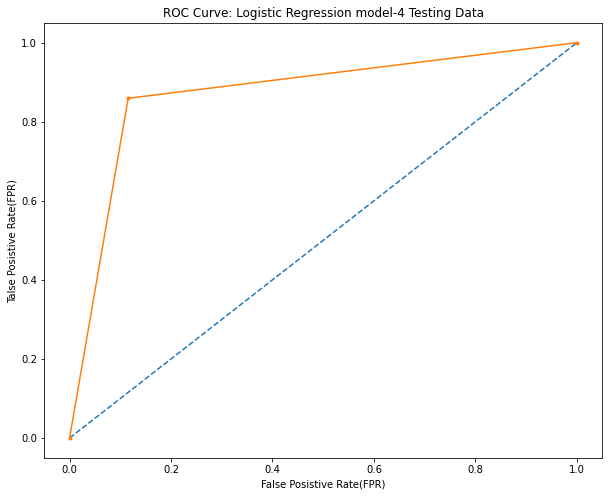

In [99]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 4
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test_smote)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Logistic Regression model-4 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LR model-4 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test_smote)))

## END of Milestone 1

### 1.8 Build a Random Forest Model on Train Dataset.

### 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [100]:
# Lets store the logistic regression 
# Store the classification report of training data for logistic regression Model into a dataframe
lgr_train_report = round(pd.DataFrame(classification_report(y_res, y_pred_train_smote,output_dict=True)),3)
lgr_train_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.94,0.91,0.93,0.93,0.93
recall,0.91,0.94,0.93,0.93,0.93
f1-score,0.92,0.93,0.93,0.93,0.93
support,2142.00,2142.00,0.93,4284.00,4284.00


In [101]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lgr_train_metrics = [lgr_train_report.iloc[0,2], #accuracy
                    lgr_train_report.iloc[0,1], # precision 
                    lgr_train_report.iloc[1,1], # recall 
                    lgr_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_res, y_pred_train_smote),3)] # roc_auc_score
lgr_train_metrics

[0.925, 0.912, 0.94, 0.926, 0.925]

In [103]:
# Store the classification report of testing data for logistic regression Model into a dataframe
lgr_test_report = round(pd.DataFrame(classification_report(y_test, y_pred_test_smote,output_dict=True)),3)
lgr_test_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.98,0.47,0.88,0.73,0.93
recall,0.88,0.86,0.88,0.87,0.88
f1-score,0.93,0.61,0.88,0.77,0.90
support,1056.00,128.00,0.88,1184.00,1184.00


In [104]:

# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lgr_test_metrics = [lgr_test_report.iloc[0,2], #accuracy
                    lgr_test_report.iloc[0,1], # precision 
                    lgr_test_report.iloc[1,1], # recall 
                    lgr_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test, y_pred_test_smote),3)] # roc_auc_score
lgr_test_metrics

[0.882, 0.474, 0.859, 0.611, 0.872]

In [105]:
# Lets create a dataframe to compare test and training model metrics of all models.
model_comp = pd.DataFrame(lgr_train_metrics,index = ['accuracy','precision','recall','f1-score','roc_auc_score'],
                            columns=['LGR_train_sm'])
model_comp['LGR_test_sm'] = lgr_test_metrics
model_comp

,LGR_train_sm,LGR_test_sm
accuracy,0.93,0.88
precision,0.91,0.47
recall,0.94,0.86
f1-score,0.93,0.61
roc_auc_score,0.93,0.87


### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Model 1 on Random Forest

In [107]:
# Lets use grid searchcv to see if the model improves with different input parameters
#We have ~2400 observations in training set. So, we can have ~1% of 2400, 25-30 as min_samples_leaf and 3 times 
#min_sample_leaf as min_samples_split, i.e., 90-120.
rf_model = RandomForestClassifier(random_state=1)

param_grid = { 'criterion' :['gini', 'entropy'],
               'min_samples_leaf' :[20,30,40],
               'min_samples_split' :[60,90,120],
               'max_depth' : [10,15,20]
                }
grid_search = GridSearchCV(estimator = rf_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 60}

In [108]:
rf_model = grid_search.best_estimator_
rf_model

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       min_samples_split=60, random_state=1)

### Validating the model on train set

In [109]:
y_pred_train = rf_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[2123   19]
 [  51  209]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2142
         1.0       0.92      0.80      0.86       260

    accuracy                           0.97      2402
   macro avg       0.95      0.90      0.92      2402
weighted avg       0.97      0.97      0.97      2402



### Validating the model on test set

In [110]:
y_pred_test = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[1055    1]
 [  37   91]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1056
         1.0       0.99      0.71      0.83       128

    accuracy                           0.97      1184
   macro avg       0.98      0.85      0.90      1184
weighted avg       0.97      0.97      0.97      1184



The ROC_AUC score for RF model-1 on testing data is 0.8549952651515151


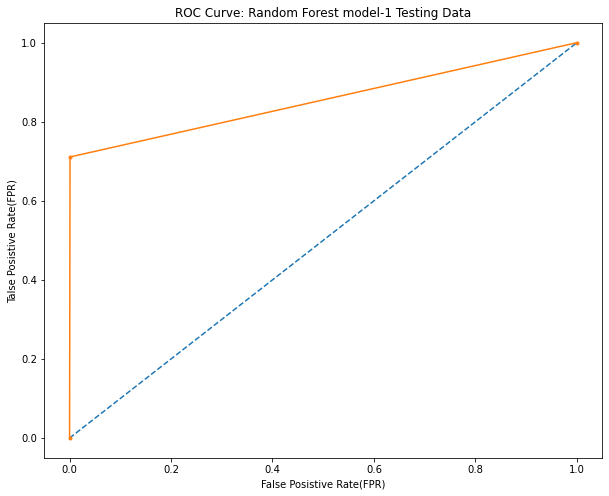

In [111]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 1
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Random Forest model-1 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for RF model-1 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test)))

### Model 2 on Random Forest using SMOTE data

In [112]:
# Lets use grid searchcv to see if the model improves with different input parameters
#We have ~1000 observations in training set. So, we can have ~1% of 4284, 40 as min_samples_leaf and 3 times 
#min_sample_leaf as min_samples_split, i.e., 120.
rf_model = RandomForestClassifier(random_state=1)

param_grid = { 'criterion' :['gini', 'entropy'],
               'min_samples_leaf' :[30,40,50],
               'min_samples_split' :[90,120,150],
               'max_depth' : [10,15,20]
                }
grid_search = GridSearchCV(estimator = rf_model,param_grid=param_grid,cv =5)
grid_search.fit(X_res,y_res)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 40,
 'min_samples_split': 90}

In [113]:
rf_model_sm = grid_search.best_estimator_
rf_model_sm

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=40,
                       min_samples_split=90, random_state=1)

### Validating the model on train set

In [114]:
y_pred_train_sm = rf_model_sm.predict(X_res)
print(confusion_matrix(y_res, y_pred_train_sm))
print(classification_report(y_res, y_pred_train_sm))

[[2104   38]
 [  80 2062]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2142
         1.0       0.98      0.96      0.97      2142

    accuracy                           0.97      4284
   macro avg       0.97      0.97      0.97      4284
weighted avg       0.97      0.97      0.97      4284



### Validating the model on test set

In [115]:
y_pred_test_sm = rf_model_sm.predict(X_test)
print(confusion_matrix(y_test, y_pred_test_sm))
print(classification_report(y_test, y_pred_test_sm))

[[1034   22]
 [  16  112]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1056
         1.0       0.84      0.88      0.85       128

    accuracy                           0.97      1184
   macro avg       0.91      0.93      0.92      1184
weighted avg       0.97      0.97      0.97      1184



The ROC_AUC score for RF model-2 on testing data is 0.9270833333333334


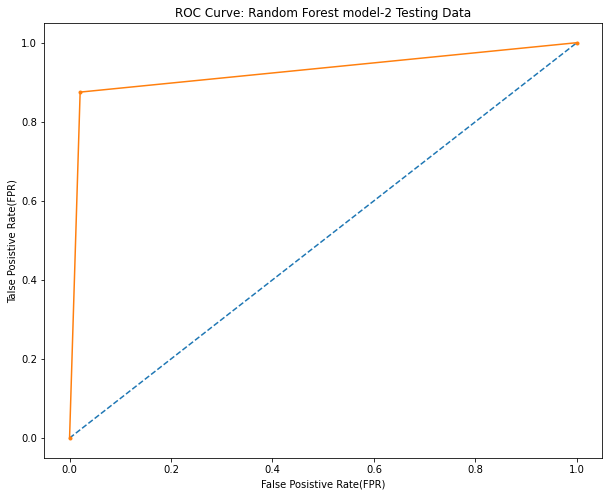

In [116]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 2
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test_sm)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: Random Forest model-2 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for RF model-2 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test_sm)))

In [117]:
# In both models above accuracy on test is same at 0.97 but we can see that the ROC_AUC score of model2 (0.927) 
# is better than model1 (0.855) and we can see that the recall is better for defaulters in model2 (0.88) against
# model1 (0.71)
# Lets store Random Forest model 2 parameters into the model_comp table.

In [118]:
# Lets store the logistic regression 
# Store the classification report of training data for logistic regression Model into a dataframe
rf_train_report = round(pd.DataFrame(classification_report(y_res, y_pred_train_sm,output_dict=True)),3)
rf_train_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.96,0.98,0.97,0.97,0.97
recall,0.98,0.96,0.97,0.97,0.97
f1-score,0.97,0.97,0.97,0.97,0.97
support,2142.00,2142.00,0.97,4284.00,4284.00


In [119]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
rf_train_metrics = [rf_train_report.iloc[0,2], #accuracy
                    rf_train_report.iloc[0,1], # precision 
                    rf_train_report.iloc[1,1], # recall 
                    rf_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_res, y_pred_train_sm),3)] # roc_auc_score
rf_train_metrics

[0.972, 0.982, 0.963, 0.972, 0.972]

In [120]:
# Store the classification report of testing data for RF Model into a dataframe
rf_test_report = round(pd.DataFrame(classification_report(y_test, y_pred_test_sm,output_dict=True)),3)
rf_test_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.98,0.84,0.97,0.91,0.97
recall,0.98,0.88,0.97,0.93,0.97
f1-score,0.98,0.85,0.97,0.92,0.97
support,1056.00,128.00,0.97,1184.00,1184.00


In [121]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
rf_test_metrics = [rf_test_report.iloc[0,2], #accuracy
                   rf_test_report.iloc[0,1], # precision 
                   rf_test_report.iloc[1,1], # recall 
                   rf_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test, y_pred_test_sm),3)] # roc_auc_score
rf_test_metrics

[0.968, 0.836, 0.875, 0.855, 0.927]

In [122]:
# Lets store Random forest model 2 metrics into model_comp.
model_comp['RF_train_sm'] = rf_train_metrics
model_comp['RF_test_sm'] = rf_test_metrics
model_comp

,LGR_train_sm,LGR_test_sm,RF_train_sm,RF_test_sm
accuracy,0.93,0.88,0.97,0.97
precision,0.91,0.47,0.98,0.84
recall,0.94,0.86,0.96,0.88
f1-score,0.93,0.61,0.97,0.85
roc_auc_score,0.93,0.87,0.97,0.93


### 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

### 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

### Linear Discriminant Analysis (LDA)

### 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Model 1 on LDA

In [124]:
# Lets use grid searchcv to see if the model improves with different input parameters
lda_model = LinearDiscriminantAnalysis()

param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.01,0.001,0.0001,0.00001,0.000001]
                }

grid_search = GridSearchCV(estimator = lda_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'solver': 'svd', 'tol': 0.01}

In [125]:
# Lets use grid searchcv to see if the model improves with different input parameters
lda_model = LinearDiscriminantAnalysis()

param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.01,0.001,0.0001,0.00001,0.000001]
                }

grid_search = GridSearchCV(estimator = lda_model,param_grid=param_grid,cv =5)
grid_search.fit(X_train,y_train)
grid_search.best_params_
{'solver': 'svd', 'tol': 0.01}

{'solver': 'svd', 'tol': 0.01}

In [126]:
lda_model = grid_search.best_estimator_
lda_model

LinearDiscriminantAnalysis(tol=0.01)

### Validating the model on train set

In [127]:
y_pred_train = lda_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[2117   25]
 [ 126  134]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2142
         1.0       0.84      0.52      0.64       260

    accuracy                           0.94      2402
   macro avg       0.89      0.75      0.80      2402
weighted avg       0.93      0.94      0.93      2402



### Validating the model on test set

In [128]:
y_pred_test = lda_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[1041   15]
 [  68   60]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1056
         1.0       0.80      0.47      0.59       128

    accuracy                           0.93      1184
   macro avg       0.87      0.73      0.78      1184
weighted avg       0.92      0.93      0.92      1184



The ROC_AUC score for LDA model-1 on testing data is 0.7272727272727273


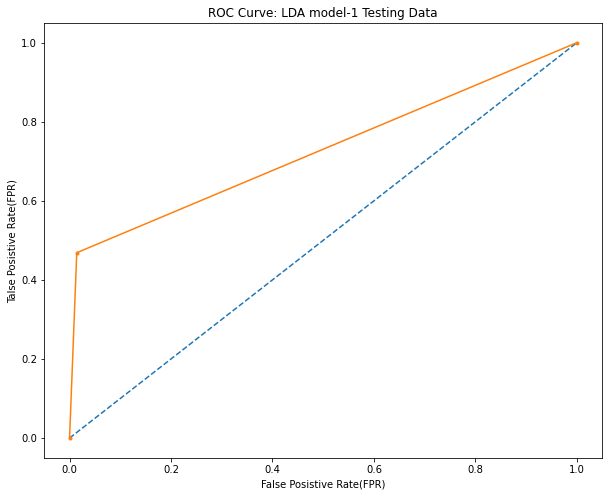

In [129]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 1
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model-1 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model-1 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test)))

### Model 2 on LDA using SMOTE data

In [130]:
lda_model = LinearDiscriminantAnalysis()

param_grid = { 'solver' :['svd', 'lsqr', 'eigen'],
               'tol' : [0.01,0.001,0.0001,0.00001,0.000001]
                }

grid_search = GridSearchCV(estimator = lda_model,param_grid=param_grid,cv =5)
grid_search.fit(X_res,y_res)
grid_search.best_params_

{'solver': 'svd', 'tol': 0.01}

In [131]:
lda_model_sm = grid_search.best_estimator_
lda_model_sm

LinearDiscriminantAnalysis(tol=0.01)

### Validating the model on train set

In [132]:
y_pred_train_sm = lda_model_sm.predict(X_res)
print(confusion_matrix(y_res, y_pred_train_sm))
print(classification_report(y_res, y_pred_train_sm))

[[1844  298]
 [  95 2047]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      2142
         1.0       0.87      0.96      0.91      2142

    accuracy                           0.91      4284
   macro avg       0.91      0.91      0.91      4284
weighted avg       0.91      0.91      0.91      4284



### Validating the model on test set

In [133]:
y_pred_test_sm = lda_model_sm.predict(X_test)
print(confusion_matrix(y_test, y_pred_test_sm))
print(classification_report(y_test, y_pred_test_sm))

[[898 158]
 [ 14 114]]
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      1056
         1.0       0.42      0.89      0.57       128

    accuracy                           0.85      1184
   macro avg       0.70      0.87      0.74      1184
weighted avg       0.92      0.85      0.88      1184



The ROC_AUC score for LDA model-2 on testing data is 0.8705018939393939


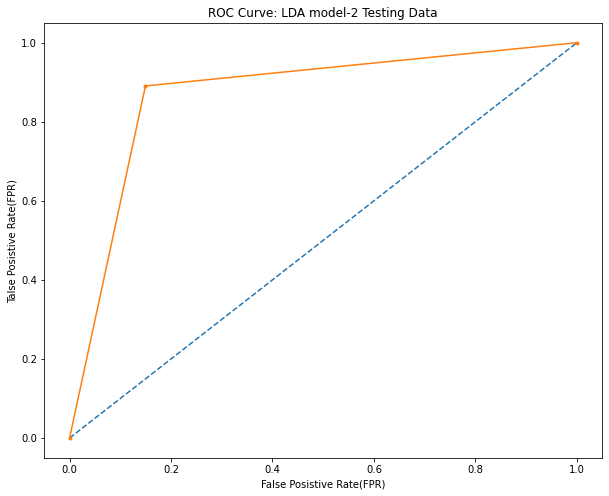

In [134]:
# Lets check the ROC_AUC score and ROC curve for testing data - Model 2
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],linestyle = '--')
fpr,tpr,threshold = roc_curve(y_test,y_pred_test_sm)
plt.plot(fpr,tpr,marker = '.')
plt.title('ROC Curve: LDA model-2 Testing Data');
plt.xlabel('False Posistive Rate(FPR)');
plt.ylabel('Talse Posistive Rate(FPR)');
print('The ROC_AUC score for LDA model-2 on testing data is {}'.format(roc_auc_score(y_test,y_pred_test_sm)))

In [135]:
# We can see model 2 has better ROC_AUC score of 0.87 against model 1 of 0.73. Recall for model 2 is at 0.89 against 0.47.
# We can see that accuracy on smote test data is 0.85, lesser than model 1 with score 0.93, but in this scenario
# recall is more important.
# Lets store the logistic regression 
# Store the classification report of training data for logistic regression Model into a dataframe
lda_train_report = round(pd.DataFrame(classification_report(y_res, y_pred_train_sm,output_dict=True)),3)
lda_train_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.95,0.87,0.91,0.91,0.91
recall,0.86,0.96,0.91,0.91,0.91
f1-score,0.90,0.91,0.91,0.91,0.91
support,2142.00,2142.00,0.91,4284.00,4284.00


In [136]:
# we will capture accuracy,precision,recall and roc_auc_score of training data into a list
lda_train_metrics = [lda_train_report.iloc[0,2], #accuracy
                     lda_train_report.iloc[0,1], # precision 
                     lda_train_report.iloc[1,1], # recall 
                     lda_train_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_res, y_pred_train_sm),3)] # roc_auc_score
lda_train_metrics

[0.908, 0.873, 0.956, 0.912, 0.908]

In [137]:
# Store the classification report of testing data for LDA Model into a dataframe
lda_test_report = round(pd.DataFrame(classification_report(y_test, y_pred_test_sm,output_dict=True)),3)
lda_test_report

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.98,0.42,0.85,0.70,0.92
recall,0.85,0.89,0.85,0.87,0.85
f1-score,0.91,0.57,0.85,0.74,0.88
support,1056.00,128.00,0.85,1184.00,1184.00


In [138]:
# we will capture accuracy,precision,recall and roc_auc_score of testing data into a list
lda_test_metrics = [lda_test_report.iloc[0,2], #accuracy
                    lda_test_report.iloc[0,1], # precision 
                    lda_test_report.iloc[1,1], # recall 
                    lda_test_report.iloc[2,1], # f1-score 
                     round(roc_auc_score(y_test, y_pred_test_sm),3)] # roc_auc_score
lda_test_metrics

[0.855, 0.419, 0.891, 0.57, 0.871]

In [140]:
# Lets store LDA model 2 metrics into model_comp.
model_comp['LDA_train_sm'] = lda_train_metrics
model_comp['LDA_test_sm'] = lda_test_metrics
model_comp

,LGR_train_sm,LGR_test_sm,RF_train_sm,RF_test_sm,LDA_train_sm,LDA_test_sm
accuracy,0.93,0.88,0.97,0.97,0.91,0.85
precision,0.91,0.47,0.98,0.84,0.87,0.42
recall,0.94,0.86,0.96,0.88,0.96,0.89
f1-score,0.93,0.61,0.97,0.85,0.91,0.57
roc_auc_score,0.93,0.87,0.97,0.93,0.91,0.87


# Market Risk

## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [141]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [142]:
# Lets fix the columns names to not have spaces.
stock_prices.columns = stock_prices.columns.str.replace(' ', '_')
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [144]:
#let us check the number of rows (observations) and the number of columns (variables)
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [145]:
#Let us check concise summary info
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [146]:
# Let us check the description f dataset
stock_prices.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.00,511.34,135.95,234.00,424.00,466.50,630.75,810.00
Indian_Hotel,314.00,114.56,22.51,64.00,96.00,115.00,134.00,157.00
Mahindra_&_Mahindra,314.00,636.68,102.88,284.00,572.00,625.00,678.00,956.00
Axis_Bank,314.00,540.74,115.84,263.00,470.50,528.00,605.25,808.00
SAIL,314.00,59.10,15.81,21.00,47.00,57.00,71.75,104.00
Shree_Cement,314.00,14806.41,4288.28,5543.00,10952.25,16018.50,17773.25,24806.00
Sun_Pharma,314.00,633.47,171.86,338.00,478.50,614.00,785.00,1089.00
Jindal_Steel,314.00,147.63,65.88,53.00,88.25,142.50,182.75,338.00
Idea_Vodafone,314.00,53.71,31.25,3.00,25.25,53.00,82.00,117.00
Jet_Airways,314.00,372.66,202.26,14.00,243.25,376.00,534.00,871.00


In [147]:
# Lets calculate range IQR and Quartile min and Quartile max of cotinuous variables into a dataset
stock_desc = stock_prices.describe().T
stock_desc['Range'] = stock_desc['max'] - stock_desc['min']
stock_desc['IQR']   = stock_desc['75%'] - stock_desc['25%']
stock_desc['Qmin']  = np.where((stock_desc['25%'] - 1.5 * stock_desc['IQR']) < stock_desc['min'],stock_desc['min'],(stock_desc['25%'] - 1.5 * stock_desc['IQR']))
stock_desc['Qmax']  = np.where((stock_desc['25%'] - 1.5 * stock_desc['IQR']) > stock_desc['max'],stock_desc['max'],(stock_desc['75%'] + 1.5 * stock_desc['IQR']))
stock_desc

,count,mean,std,min,25%,50%,75%,max,Range,IQR,Qmin,Qmax
Infosys,314.00,511.34,135.95,234.00,424.00,466.50,630.75,810.00,576.00,206.75,234.00,940.88
Indian_Hotel,314.00,114.56,22.51,64.00,96.00,115.00,134.00,157.00,93.00,38.00,64.00,191.00
Mahindra_&_Mahindra,314.00,636.68,102.88,284.00,572.00,625.00,678.00,956.00,672.00,106.00,413.00,837.00
Axis_Bank,314.00,540.74,115.84,263.00,470.50,528.00,605.25,808.00,545.00,134.75,268.38,807.38
SAIL,314.00,59.10,15.81,21.00,47.00,57.00,71.75,104.00,83.00,24.75,21.00,108.88
Shree_Cement,314.00,14806.41,4288.28,5543.00,10952.25,16018.50,17773.25,24806.00,19263.00,6821.00,5543.00,28004.75
Sun_Pharma,314.00,633.47,171.86,338.00,478.50,614.00,785.00,1089.00,751.00,306.50,338.00,1244.75
Jindal_Steel,314.00,147.63,65.88,53.00,88.25,142.50,182.75,338.00,285.00,94.50,53.00,324.50
Idea_Vodafone,314.00,53.71,31.25,3.00,25.25,53.00,82.00,117.00,114.00,56.75,3.00,167.12
Jet_Airways,314.00,372.66,202.26,14.00,243.25,376.00,534.00,871.00,857.00,290.75,14.00,970.12


In [148]:
# We can see that there are no missing values.
# Let su convert the Date column into datetime variable than keep it as an objject.
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


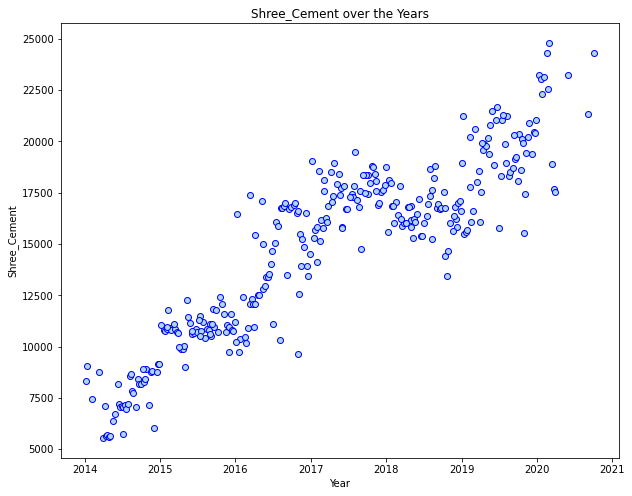

In [149]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['Date'], stock_prices['Shree_Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree_Cement over the Years')
plt.show()

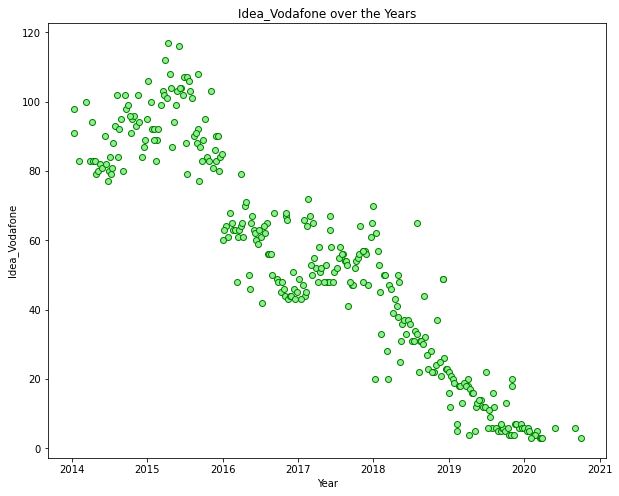

In [150]:
plt.figure(figsize = (10, 8))
plt.scatter(stock_prices['Date'], stock_prices['Idea_Vodafone'], edgecolors='g', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the Years')
plt.show()

In [151]:
# Lets calculate the weekly stock return, this is done by taking log of the price value 
# and finding difference of each row with previous row
stock_returns = np.log(stock_prices.drop('Date',axis=1)).diff(axis = 0, periods = 1)
stock_returns.head(5)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15


In [176]:
stock_returns.tail(5)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,0.01,-0.11,0.03,-0.06,-0.09,0.02,0.07,-0.05,-0.29,-0.13
310,-0.14,-0.05,-0.09,-0.15,-0.10,-0.08,-0.04,-0.19,0.69,-0.20
311,-0.09,-0.24,-0.29,-0.28,-0.11,-0.12,-0.05,-0.14,-0.69,-0.12
312,0.11,-0.18,-0.09,-0.17,-0.25,-0.07,-0.08,-0.17,0.00,-0.13
313,-0.02,0.00,-0.03,0.05,0.09,-0.01,0.04,-0.08,0.00,0.00


In [152]:
stock_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,313.00,0.00,0.04,-0.17,-0.01,0.00,0.02,0.14
Indian_Hotel,313.00,0.00,0.05,-0.24,-0.02,0.00,0.03,0.20
Mahindra_&_Mahindra,313.00,-0.00,0.04,-0.29,-0.02,0.00,0.02,0.09
Axis_Bank,313.00,0.00,0.05,-0.28,-0.02,0.00,0.03,0.13
SAIL,313.00,-0.00,0.06,-0.25,-0.04,0.00,0.03,0.31
Shree_Cement,313.00,0.00,0.04,-0.13,-0.02,0.00,0.03,0.15
Sun_Pharma,313.00,-0.00,0.05,-0.18,-0.02,0.00,0.02,0.17
Jindal_Steel,313.00,-0.00,0.08,-0.28,-0.05,0.00,0.04,0.24
Idea_Vodafone,313.00,-0.01,0.10,-0.69,-0.05,0.00,0.02,0.69
Jet_Airways,313.00,-0.01,0.10,-0.46,-0.05,-0.01,0.04,0.30


In [153]:
# let us store only the mean and std into a dataset.
stock_metrics = stock_returns.describe().T[['mean','std']]

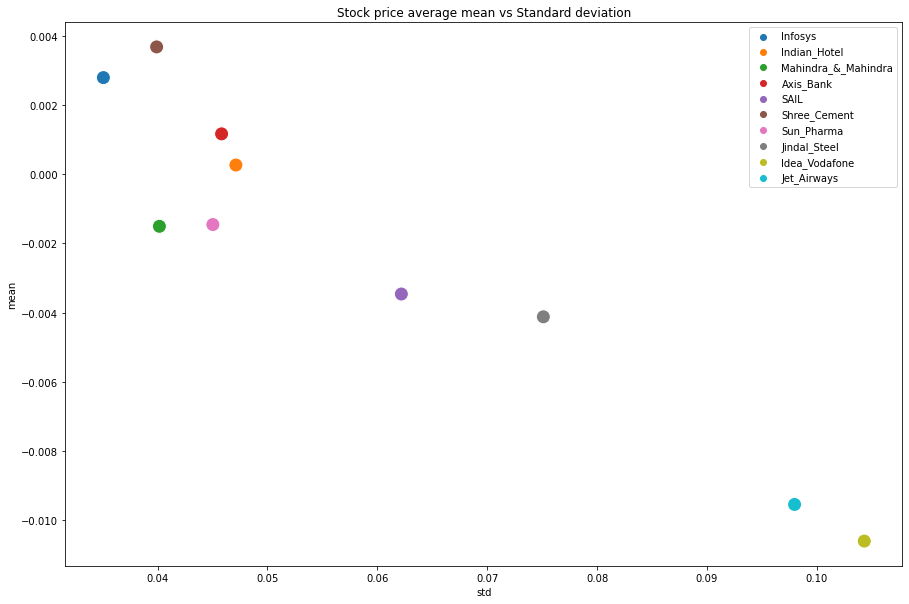

In [162]:
#Let us plot a scatter plot between standard deviation and mean
plt.figure(figsize = (15, 10))
plot = sns.scatterplot(stock_metrics['std'], stock_metrics['mean'],hue=stock_metrics.index,s=200)
plt.title('Stock price average mean vs Standard deviation')
plt.show()

In [163]:
# Lets also look at cumulative price movement
stock_movement = pd.DataFrame(stock_prices.loc[0])
stock_movement

,0
Date,2014-03-31 00:00:00
Infosys,264
Indian_Hotel,69
Mahindra_&_Mahindra,455
Axis_Bank,263
SAIL,68
Shree_Cement,5543
Sun_Pharma,555
Jindal_Steel,298
Idea_Vodafone,83


In [166]:
stock_movement[1] = stock_prices.loc[313]
stock_movement = stock_movement.iloc[1:,]

In [167]:
stock_movement['perc_change'] = (((stock_movement[1] - stock_movement[0])/stock_movement[0]) * 100)
stock_movement.sort_values(by='perc_change')

,0,1,perc_change
Idea_Vodafone,83,3,-96.39
Jet_Airways,278,14,-94.96
Jindal_Steel,298,82,-72.48
SAIL,68,23,-66.18
Mahindra_&_Mahindra,455,284,-37.58
Sun_Pharma,555,352,-36.58
Indian_Hotel,69,75,8.70
Axis_Bank,263,379,44.11
Shree_Cement,5543,17546,216.54


# END of FRA Milestone 2